In [179]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
from pandas.plotting import table
import scipy.stats
import matplotlib.pyplot as plt
%matplotlib inline

!pip install pingouin
!pip install --upgrade pingouin
import pingouin as pg

import scipy
from scipy.stats import chi2
from scipy.stats import chi2_contingency
from scipy.stats import pearsonr, spearmanr

from sklearn.metrics import  precision_recall_curve, roc_auc_score, confusion_matrix, accuracy_score, recall_score, precision_score, f1_score,auc, roc_curve, plot_confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import Perceptron
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn import tree
from sklearn.tree import export_graphviz

from IPython.display import Image
from six import StringIO
import six
import sys
sys.modules['sklearn.externals.six'] = six
! pip install --upgrade category_encoders
from category_encoders import BinaryEncoder
import pydotplus

seed = 42

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [180]:
# loading the dataset
df = pd.read_csv('/content/bank_marketing_campaign.csv') 
df.head() 

age        job  marital    education  default housing loan  pdays  \
0   56  housemaid  married     basic.4y       no      no   no    999   
1   57   services  married  high.school  unknown      no   no    999   
2   37   services  married  high.school       no     yes   no    999   
3   40     admin.  married     basic.6y       no      no   no    999   
4   56   services  married  high.school       no      no  yes    999   

   previous     poutcome  emp.var.rate  cons.price.idx  cons.conf.idx  \
0         0  nonexistent           1.1          93.994          -36.4   
1         0  nonexistent           1.1          93.994          -36.4   
2         0  nonexistent           1.1          93.994          -36.4   
3         0  nonexistent           1.1          93.994          -36.4   
4         0  nonexistent           1.1          93.994          -36.4   

   euribor3m  nr.employed   y  
0      4.857       5191.0  no  
1      4.857       5191.0  no  
2      4.857       5191.0  no  
3      4.857       5191.0  no  
4      4.857       5191.0  no

#Basic information of Dataset

In [181]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   pdays           41188 non-null  int64  
 8   previous        41188 non-null  int64  
 9   poutcome        41188 non-null  object 
 10  emp.var.rate    41188 non-null  float64
 11  cons.price.idx  41188 non-null  float64
 12  cons.conf.idx   41188 non-null  float64
 13  euribor3m       41188 non-null  float64
 14  nr.employed     41188 non-null  float64
 15  y               41188 non-null  object 
dtypes: float64(5), int64(3), object(8)
memory usage: 5.0+ MB


In [182]:
# converting into a binary numeric variable
df['target'] = df.apply(lambda row: 1 if row["y"] == "yes" else 0, axis=1)
df.drop(["y"],axis=1,inplace=True)

In [183]:
# Renaming some columns for better typing and calling variables
df.rename(columns={"emp.var.rate":"emp_var_rate", "cons.price.idx":"cons_price_idx", "cons.conf.idx":"cons_conf_idx", "nr.employed":"nr_employed"}, inplace=True)
df.head()

age        job  marital    education  default housing loan  pdays  \
0   56  housemaid  married     basic.4y       no      no   no    999   
1   57   services  married  high.school  unknown      no   no    999   
2   37   services  married  high.school       no     yes   no    999   
3   40     admin.  married     basic.6y       no      no   no    999   
4   56   services  married  high.school       no      no  yes    999   

   previous     poutcome  emp_var_rate  cons_price_idx  cons_conf_idx  \
0         0  nonexistent           1.1          93.994          -36.4   
1         0  nonexistent           1.1          93.994          -36.4   
2         0  nonexistent           1.1          93.994          -36.4   
3         0  nonexistent           1.1          93.994          -36.4   
4         0  nonexistent           1.1          93.994          -36.4   

   euribor3m  nr_employed  target  
0      4.857       5191.0       0  
1      4.857       5191.0       0  
2      4.857       5191.0       0  
3      4.857       5191.0       0  
4      4.857       5191.0       0

In [184]:
# Printing number of observations, variables including the target, and duplicate samples
print(f"Number of clients: {df.shape[0]}")
print(f"Number of variables: {df.shape[1]} incl. target")
print(f"Number of duplicate entries: {df.duplicated().sum()}")

Number of clients: 41188
Number of variables: 16 incl. target
Number of duplicate entries: 5853



[0] Number of clients that haven't subscribed the term deposit: ... 36548
[1] Number of clients that have subscribed the term deposit: ....... 4640



clients      %
0    36548  88.73
1     4640  11.27

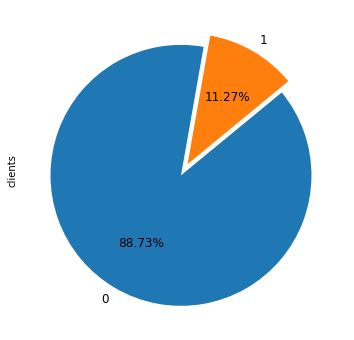

In [185]:
# How many clients have subscribed the term deposit and how many didn't?
absolut = df.target.value_counts().to_frame().rename(columns={"target":"clients"})
percent = (df.target.value_counts(normalize=True)*100).to_frame().rename(columns={"target":"%"})
df_bal = pd.concat([absolut,percent],axis=1).round(decimals=2)
print("")
print(f"[0] Number of clients that haven't subscribed the term deposit: ... {df.target.value_counts()[0]}")
print(f"[1] Number of clients that have subscribed the term deposit: ....... {df.target.value_counts()[1]}")
print("")
display(df_bal)
absolut.plot(kind='pie', subplots=True, autopct='%1.2f%%', 
             explode= (0.05, 0.05), startangle=80, 
             legend=False, fontsize=12, figsize=(14,6));

##Exploratory Data Analysis

variables datatypes we are dealing with                                                  
missing values                                                                   
corelations                                                                    
statistical description of variables numerical& catagorical                      
visualising the data

In [186]:
# Type of variables
df.dtypes.sort_values(ascending=True)

age                 int64
pdays               int64
previous            int64
target              int64
emp_var_rate      float64
cons_price_idx    float64
cons_conf_idx     float64
euribor3m         float64
nr_employed       float64
job                object
marital            object
education          object
default            object
housing            object
loan               object
poutcome           object
dtype: object

In [187]:
# Counting variables by type
df.dtypes.value_counts(ascending=True) 

int64      4
float64    5
object     7
dtype: int64

In [188]:
# Detecting missing values
display(df.isnull().sum())
print("")
print(f"Are there any missing values? {df.isnull().values.any()}") 

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
pdays             0
previous          0
poutcome          0
emp_var_rate      0
cons_price_idx    0
cons_conf_idx     0
euribor3m         0
nr_employed       0
target            0
dtype: int64


Are there any missing values? False


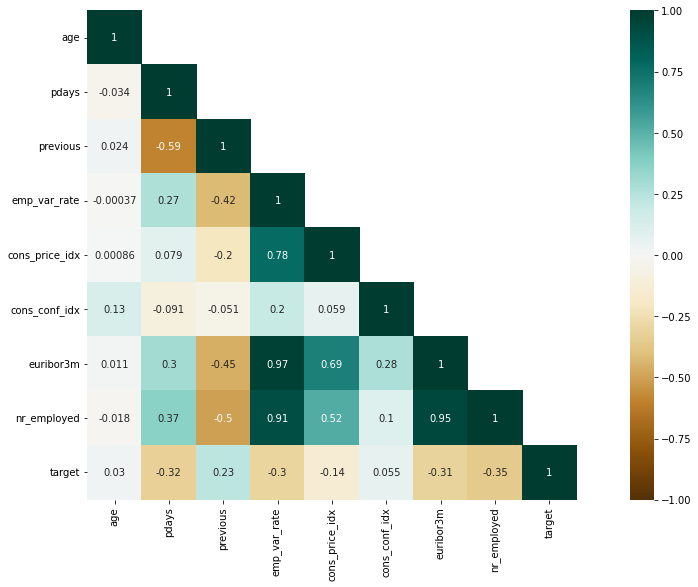

In [189]:
# Visualization of correlations (heatmap)
mask = np.triu(df.corr(), 1)
plt.figure(figsize=(19, 9))
sns.heatmap(df.corr(), annot=True, vmax=1, vmin = -1, square=True, cmap='BrBG', mask=mask);

### General stats of numeric variables

In [190]:
describe = df.describe()
describe.append(pd.Series(df.var(), name='variance'))

age         pdays      previous  emp_var_rate  \
count     41188.000000  41188.000000  41188.000000  41188.000000   
mean         40.024060    962.475454      0.172963      0.081886   
std          10.421250    186.910907      0.494901      1.570960   
min          17.000000      0.000000      0.000000     -3.400000   
25%          32.000000    999.000000      0.000000     -1.800000   
50%          38.000000    999.000000      0.000000      1.100000   
75%          47.000000    999.000000      0.000000      1.400000   
max          98.000000    999.000000      7.000000      1.400000   
variance    108.602451  34935.687284      0.244927      2.467915   

          cons_price_idx  cons_conf_idx     euribor3m   nr_employed  \
count       41188.000000   41188.000000  41188.000000  41188.000000   
mean           93.575664     -40.502600      3.621291   5167.035911   
std             0.578840       4.628198      1.734447     72.251528   
min            92.201000     -50.800000      0.634000   4963.600000   
25%            93.075000     -42.700000      1.344000   5099.100000   
50%            93.749000     -41.800000      4.857000   5191.000000   
75%            93.994000     -36.400000      4.961000   5228.100000   
max            94.767000     -26.900000      5.045000   5228.100000   
variance        0.335056      21.420215      3.008308   5220.283250   

                target  
count     41188.000000  
mean          0.112654  
std           0.316173  
min           0.000000  
25%           0.000000  
50%           0.000000  
75%           0.000000  
max           1.000000  
variance      0.099966

In [191]:
# General stats of categoric variables
df.describe(include=['object']) 

job  marital          education default housing   loan     poutcome
count    41188    41188              41188   41188   41188  41188        41188
unique      12        4                  8       3       3      3            3
top     admin.  married  university.degree      no     yes     no  nonexistent
freq     10422    24928              12168   32588   21576  33950        35563

# **#Statistic description of all variables**

#numeric variables(df_num)

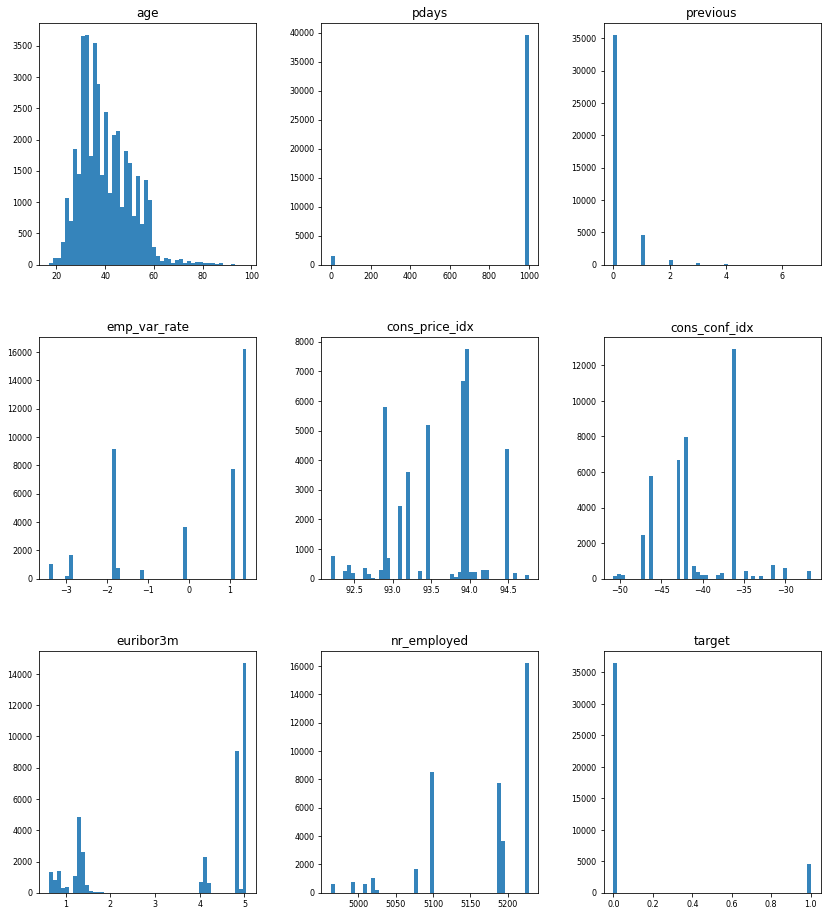

In [192]:
# Graphic visualization of the numeric distribution
df.hist(figsize=(14, 16), bins=50, xlabelsize=8, ylabelsize=8, alpha=0.9, grid=False)
plt.show()

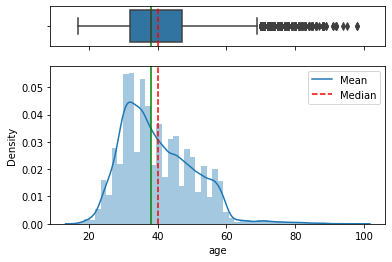

In [193]:
# Visualization of 'age'
age = df.age
np.array(age).mean()
np.median(age)

f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw= {"height_ratios": (0.5, 2)})
mean=np.array(age).mean()
median=np.median(age)

sns.boxplot(age, ax=ax_box)
ax_box.axvline(mean, color='r', linestyle='--')
ax_box.axvline(median, color='g', linestyle='-')

sns.distplot(age, ax=ax_hist)
ax_hist.axvline(mean, color='r', linestyle='--')
ax_hist.axvline(median, color='g', linestyle='-')

plt.legend({'Mean':mean,'Median':median})
ax_box.set(xlabel='')
plt.show()

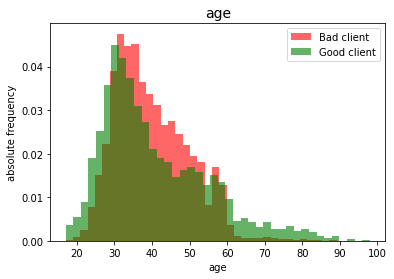

In [194]:
# Visualization variable vs. target
age_0 = df[df.target == 0].iloc[:,:1]
age_1 = df[df.target == 1].iloc[:,:1]

a = np.array(age_0)
b = np.array(age_1)

np.warnings.filterwarnings('ignore')

plt.hist(a, bins=40, density=True, color="r", alpha = 0.6, label='Bad client')
plt.hist(b, bins=40, density=True, color="g", alpha = 0.6, label='Good client')
plt.legend(loc='upper right')
plt.title('age', fontsize=14)
plt.xlabel('age')
plt.ylabel('absolute frequency')
plt.show()

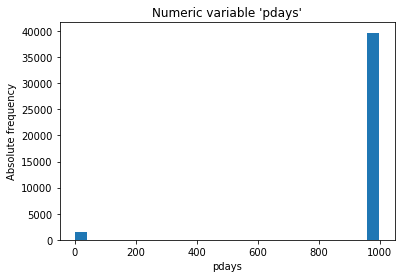

In [195]:
# Visualization of 'pdays'
plt.hist(df.pdays, bins=25)
plt.title('Numeric variable \'pdays\'', fontsize=12)
plt.xlabel('pdays')
plt.ylabel('Absolute frequency')
plt.show()

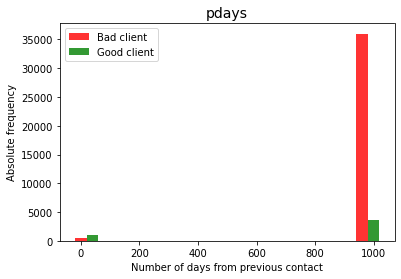

In [196]:
# Visualization variable vs. target
pdays_0 = df[df.target == 0].iloc[:,7:8]
pdays_1 = df[df.target == 1].iloc[:,7:8]

a = np.array(pdays_0)
b = np.array(pdays_1)

np.warnings.filterwarnings('ignore')

plt.hist(a, bins=25, density=False, color="r", alpha = 0.8, label='Bad client', align="left")
plt.hist(b, bins=25, density=False, color="g", alpha = 0.8, label='Good client', align="right")
plt.legend(loc='upper left')
plt.title('pdays', fontsize=14)
plt.xlabel('Number of days from previous contact')
plt.ylabel('Absolute frequency')
plt.show()

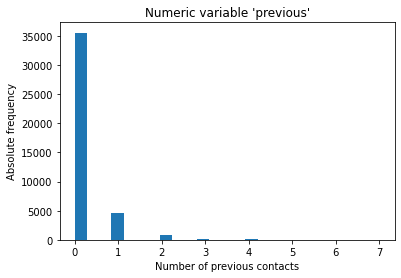

In [197]:
# Visualization of the numeric variable 'pdays'
plt.hist(df.previous, bins=25)
plt.title('Numeric variable \'previous\'', fontsize=12)
plt.xlabel('Number of previous contacts')
plt.ylabel('Absolute frequency')
plt.show()

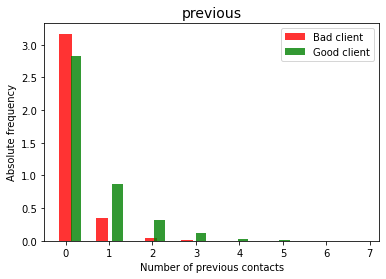

In [198]:
# Visualization variable vs. target
previous_0 = df[df.target == 0].iloc[:,8:9]
previous_1 = df[df.target == 1].iloc[:,8:9]

a = np.array(previous_0)
b = np.array(previous_1)

np.warnings.filterwarnings('ignore')

plt.hist(a, bins=25, density=True, color="r", alpha = 0.8, label='Bad client', align="left")
plt.hist(b, bins=25, density=True, color="g", alpha = 0.8, label='Good client', align="right")
plt.legend(loc='upper right')
plt.title('previous', fontsize=14)
plt.xlabel('Number of previous contacts')
plt.ylabel('Absolute frequency')
plt.show()

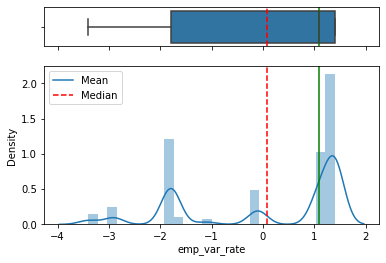

In [199]:
# Visualization of the numeric 'emp_var_rate'
emp_var_rate = df.emp_var_rate
np.array(emp_var_rate).mean()
np.median(emp_var_rate)

f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw= {"height_ratios": (0.5, 2)})
mean=np.array(emp_var_rate).mean()
median=np.median(emp_var_rate)

sns.boxplot(emp_var_rate, ax=ax_box)
ax_box.axvline(mean, color='r', linestyle='--')
ax_box.axvline(median, color='g', linestyle='-')

sns.distplot(emp_var_rate, ax=ax_hist)
ax_hist.axvline(mean, color='r', linestyle='--')
ax_hist.axvline(median, color='g', linestyle='-')

plt.legend({'Mean':mean,'Median':median})
ax_box.set(xlabel='')
plt.show()

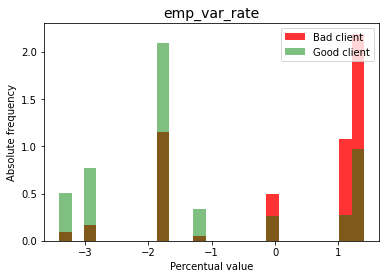

In [200]:
# Visualization of variable vs. target
emp_var_rate_0 = df[df.target == 0].iloc[:,10:11]
emp_var_rate_1 = df[df.target == 1].iloc[:,10:11]

a = np.array(emp_var_rate_0)
b = np.array(emp_var_rate_1)

np.warnings.filterwarnings('ignore')

plt.hist(a, bins=25, density=True, color="r", alpha = 0.8, label='Bad client')
plt.hist(b, bins=25, density=True, color="g", alpha = 0.5, label='Good client')
plt.legend(loc='upper right')
plt.title('emp_var_rate', fontsize=14)
plt.xlabel('Percentual value')
plt.ylabel('Absolute frequency')
plt.show()

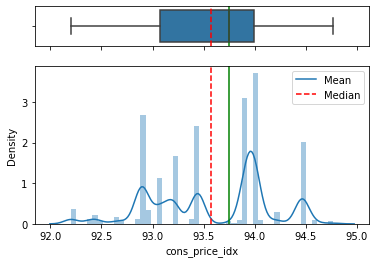

In [201]:
# Visualization of numeric 'cons_price_idx'
cons_price_idx = df.cons_price_idx
np.array(cons_price_idx).mean()
np.median(cons_price_idx)

f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw= {"height_ratios": (0.5, 2)})
mean=np.array(cons_price_idx).mean()
median=np.median(cons_price_idx)

sns.boxplot(cons_price_idx, ax=ax_box)
ax_box.axvline(mean, color='r', linestyle='--')
ax_box.axvline(median, color='g', linestyle='-')

sns.distplot(cons_price_idx, ax=ax_hist)
ax_hist.axvline(mean, color='r', linestyle='--')
ax_hist.axvline(median, color='g', linestyle='-')

plt.legend({'Mean':mean,'Median':median})
ax_box.set(xlabel='')
plt.show()

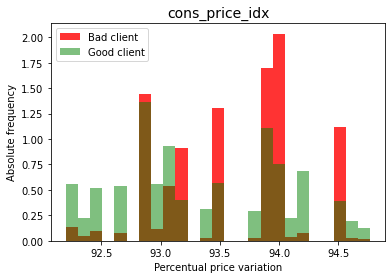

In [202]:
# Visualization of variable vs. target
cons_price_idx_0 = df[df.target == 0].iloc[:,11:12]
cons_price_idx_1 = df[df.target == 1].iloc[:,11:12]

a = np.array(cons_price_idx_0)
b = np.array(cons_price_idx_1)

np.warnings.filterwarnings('ignore')

plt.hist(a, bins=25, density=True, color="r", alpha = 0.8, label='Bad client')
plt.hist(b, bins=25, density=True, color="g", alpha = 0.5, label='Good client')
plt.legend(loc='upper left')
plt.title('cons_price_idx', fontsize=14)
plt.xlabel('Percentual price variation')
plt.ylabel('Absolute frequency')
plt.show()

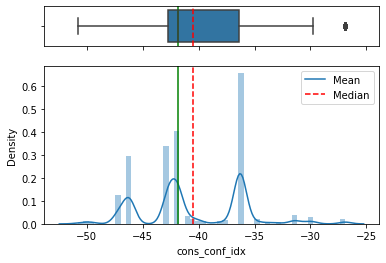

In [203]:
# Visualization of numeric 'cons_conf_idx'
cons_conf_idx = df.cons_conf_idx
np.array(cons_conf_idx).mean()
np.median(cons_conf_idx)

f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw= {"height_ratios": (0.5, 2)})
mean=np.array(cons_conf_idx).mean()
median=np.median(cons_conf_idx)

sns.boxplot(cons_conf_idx, ax=ax_box)
ax_box.axvline(mean, color='r', linestyle='--')
ax_box.axvline(median, color='g', linestyle='-')

sns.distplot(cons_conf_idx, ax=ax_hist)
ax_hist.axvline(mean, color='r', linestyle='--')
ax_hist.axvline(median, color='g', linestyle='-')

plt.legend({'Mean':mean,'Median':median})
ax_box.set(xlabel='')
plt.show()

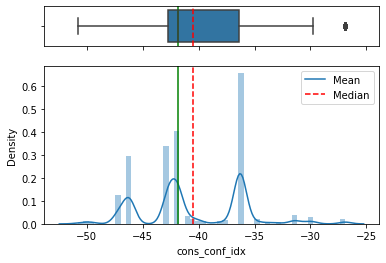

In [204]:
# Visualization of numeric 'cons_conf_idx'
cons_conf_idx = df.cons_conf_idx
np.array(cons_conf_idx).mean()
np.median(cons_conf_idx)

f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw= {"height_ratios": (0.5, 2)})
mean=np.array(cons_conf_idx).mean()
median=np.median(cons_conf_idx)

sns.boxplot(cons_conf_idx, ax=ax_box)
ax_box.axvline(mean, color='r', linestyle='--')
ax_box.axvline(median, color='g', linestyle='-')

sns.distplot(cons_conf_idx, ax=ax_hist)
ax_hist.axvline(mean, color='r', linestyle='--')
ax_hist.axvline(median, color='g', linestyle='-')

plt.legend({'Mean':mean,'Median':median})
ax_box.set(xlabel='')
plt.show()

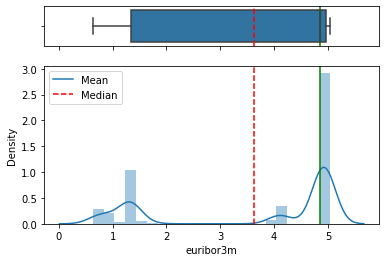

In [205]:
# Visualization of numeric 'euribor3m'
euribor3m = df.euribor3m
np.array(euribor3m).mean()
np.median(euribor3m)

f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw= {"height_ratios": (0.5, 2)})
mean=np.array(euribor3m).mean()
median=np.median(euribor3m)

sns.boxplot(euribor3m, ax=ax_box)
ax_box.axvline(mean, color='r', linestyle='--')
ax_box.axvline(median, color='g', linestyle='-')

sns.distplot(euribor3m, ax=ax_hist)
ax_hist.axvline(mean, color='r', linestyle='--')
ax_hist.axvline(median, color='g', linestyle='-')

plt.legend({'Mean':mean,'Median':median})
ax_box.set(xlabel='')
plt.show()

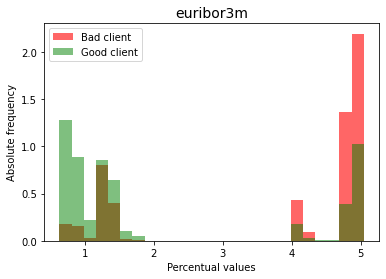

In [206]:
# Visualization of variable vs. target
euribor3m_0 = df[df.target == 0].iloc[:,13:14]
euribor3m_1 = df[df.target == 1].iloc[:,13:14]

a = np.array(euribor3m_0)
b = np.array(euribor3m_1)

np.warnings.filterwarnings('ignore')

plt.hist(a, bins=25, density=True, color="r", alpha = 0.6, label='Bad client')
plt.hist(b, bins=25, density=True, color="g", alpha = 0.5, label='Good client')
plt.legend(loc='upper left')
plt.title('euribor3m', fontsize=14)
plt.xlabel('Percentual values')
plt.ylabel('Absolute frequency')
plt.show()

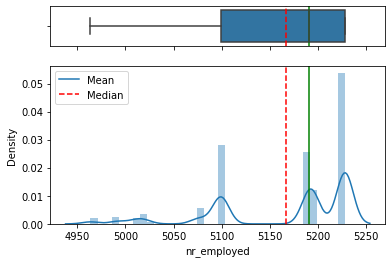

In [207]:
# Visualização da variável numérica 'nr_employed'
nr_employed = df.nr_employed
np.array(nr_employed).mean()
np.median(nr_employed)

f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw= {"height_ratios": (0.5, 2)})
mean=np.array(nr_employed).mean()
median=np.median(nr_employed)

sns.boxplot(nr_employed, ax=ax_box)
ax_box.axvline(mean, color='r', linestyle='--')
ax_box.axvline(median, color='g', linestyle='-')

sns.distplot(nr_employed, ax=ax_hist)
ax_hist.axvline(mean, color='r', linestyle='--')
ax_hist.axvline(median, color='g', linestyle='-')

plt.legend({'Mean':mean,'Median':median})
ax_box.set(xlabel='')
plt.show()

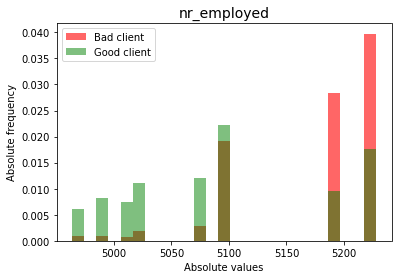

In [208]:
# Visualization of variable vs. target
nr_employed_0 = df[df.target == 0].iloc[:,14:15]
nr_employed_1 = df[df.target == 1].iloc[:,14:15]

a = np.array(nr_employed_0)
b = np.array(nr_employed_1)

np.warnings.filterwarnings('ignore')

plt.hist(a, bins=25, density=True, color="r", alpha = 0.6, label='Bad client')
plt.hist(b, bins=25, density=True, color="g", alpha = 0.5, label='Good client')
plt.legend(loc='upper left')
plt.title('nr_employed', fontsize=14)
plt.xlabel('Absolute values')
plt.ylabel('Absolute frequency')
plt.show()

#Categorical variables (df_cat)

##Variable: job

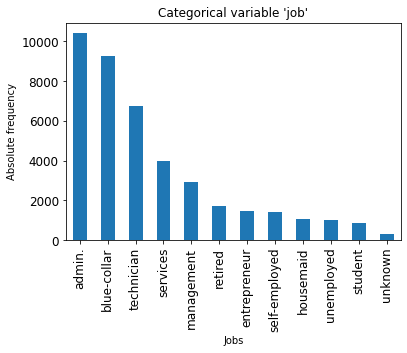

In [209]:
# Visualization of the categoric 'job'
data_count = df['job'].value_counts().plot(kind='bar', figsize=(6,4), fontsize=12)
plt.title('Categorical variable \'job\'', fontsize=12)
plt.xlabel('Jobs')
plt.ylabel('Absolute frequency')
plt.show()

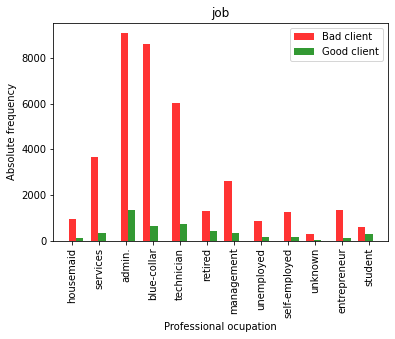

In [210]:
# Graph 'job' vs. 'target'
job_0 = df[df.target == 0].iloc[:,1:2]
job_1 = df[df.target == 1].iloc[:,1:2]

a = np.array(job_0)
b = np.array(job_1)

np.warnings.filterwarnings('ignore')

plt.hist(a, bins=40, color="r", alpha = 0.8, label='Bad client', align="left")
plt.hist(b, bins=40, color="g", alpha = 0.8, label='Good client', align="right")
plt.legend(loc='upper right')
plt.title('job', fontsize=12)
plt.xlabel('Professional ocupation')
plt.xticks(rotation='vertical')
plt.ylabel('Absolute frequency')
plt.show()


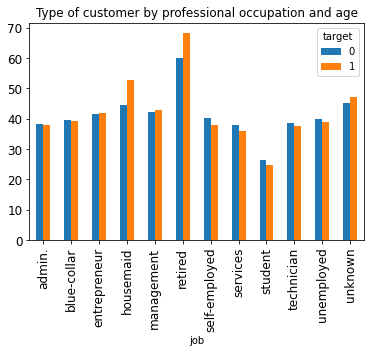

In [211]:
# Graph: type of customer by professional occupation and age
#Pivot_table
type_pivot = df.pivot_table(
    columns="target",
    index="job",
    values="age", aggfunc=np.mean)

# Display pivot_table
type_pivot.sort_values(by=["job"], 
                       ascending=True).plot(kind="bar", 
                                             title=("Type of customer by professional occupation and age"), 
                                             figsize=(6,4),
                                             fontsize = 12);

Variable: 'marital'
Discription: Marital situation
Type of variable: object
Total observations: 41188
Unique values: 4
List of unique values: ['married' 'single' 'divorced' 'unknown']



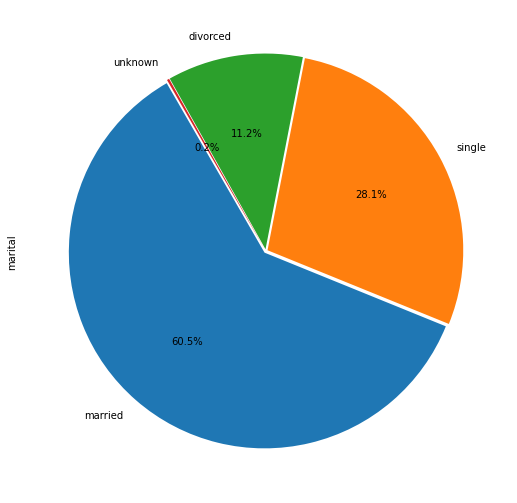

In [212]:
print("Variable: 'marital'")
print("Discription: Marital situation")
print(f"Type of variable: {df.marital.dtype}")
print(f"Total observations: {df.marital.shape[0]}")
print(f"Unique values: {df.marital.nunique()}")
print(f"List of unique values: {df.marital.unique()}")
print("")

# Graph "pie"
df['marital'].value_counts(dropna=False).plot(kind='pie', figsize=(14,9),
                                              explode = (0.01, 0.01, 0.01, 0.01),
                                              autopct='%1.1f%%',
                                              startangle=120);

Freq abs  percent %
married      24928      60.52
single       11568      28.09
divorced      4612      11.20
unknown         80       0.19

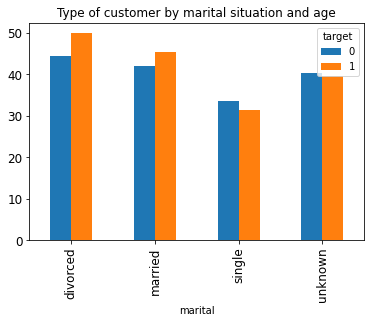

In [213]:
# Number of observations by class
marital_obs = df.marital.value_counts()
marital_o = pd.DataFrame(marital_obs)
marital_o.rename(columns={"marital":"Freq abs"}, inplace=True)
marital_o_pc = (df.marital.value_counts(normalize=True) * 100).round(decimals=2)
marital_obs_pc = pd.DataFrame(marital_o_pc)
marital_obs_pc.rename(columns={"marital":"percent %"}, inplace=True)
marital_obs = pd.concat([marital_o,marital_obs_pc], axis=1)
display(marital_obs)

# Graph: Type of customer by marital situation and age
# Pivot_table
type_pivot = df.pivot_table(
    columns="target",
    index="marital",
    values="age", aggfunc=np.mean)

# Display pivot_table
type_pivot.sort_values(by=["marital"], 
                       ascending=True).plot(kind="bar", 
                                             title=("Type of customer by marital situation and age"), 
                                             figsize=(6,4),
                                             fontsize = 12);

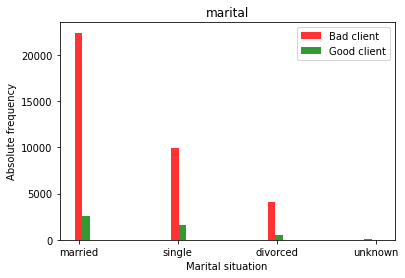

In [214]:
# Graph 'marital' vs. 'target'
marital_0 = df[df.target == 0].iloc[:,2:3]
marital_1 = df[df.target == 1].iloc[:,2:3]

a = np.array(marital_0)
b = np.array(marital_1)

np.warnings.filterwarnings('ignore')

plt.hist(a, bins=40, color="r", alpha = 0.8, label='Bad client', align="left")
plt.hist(b, bins=40, color="g", alpha = 0.8, label='Good client', align="right")
plt.legend(loc='upper right')
plt.title('marital', fontsize=12)
plt.xlabel('Marital situation')
plt.xticks(rotation='horizontal')
plt.ylabel('Absolute frequency')
plt.show()

Variable: 'education'
Discription: Education level
Type of variable: object
Total observations: 41188
Unique values: 8
List of unique values: ['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']



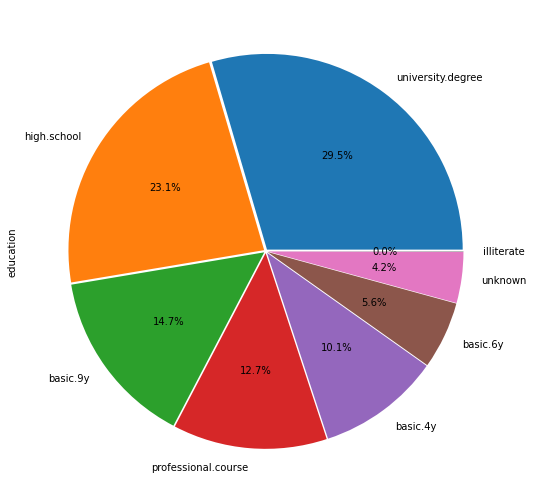

In [215]:
print("Variable: 'education'")
print("Discription: Education level")
print(f"Type of variable: {df.education.dtype}")
print(f"Total observations: {df.education.shape[0]}")
print(f"Unique values: {df.education.nunique()}")
print(f"List of unique values: {df.education.unique()}")
print("")

# Graph "pie"
df['education'].value_counts(dropna=False).plot(kind='pie', 
                                                figsize=(13,9), 
                                                explode = (0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01),
                                                autopct='%1.1f%%',
                                                startangle=0);


Freq abs  percent %
university.degree       12168      29.54
high.school              9515      23.10
basic.9y                 6045      14.68
professional.course      5243      12.73
basic.4y                 4176      10.14
basic.6y                 2292       5.56
unknown                  1731       4.20
illiterate                 18       0.04

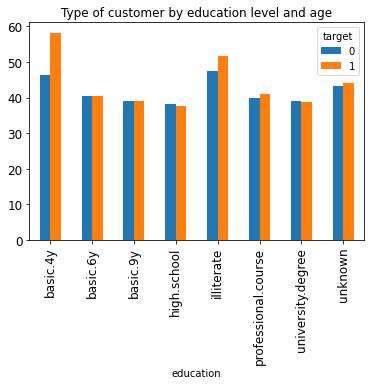

In [216]:
# Number of observations by class
edu_obs = df.education.value_counts()
edu_o = pd.DataFrame(edu_obs)
edu_o.rename(columns={"education":"Freq abs"}, inplace=True)
edu_o_pc = (df.education.value_counts(normalize=True) * 100).round(decimals=2)
edu_obs_pc = pd.DataFrame(edu_o_pc)
edu_obs_pc.rename(columns={"education":"percent %"}, inplace=True)
edu_obs = pd.concat([edu_o,edu_obs_pc], axis=1)
display(edu_obs)

# Graph: Type of customer by education level and age
# Pivot_table
type_pivot = df.pivot_table(
    columns="target",
    index="education",
    values="age", aggfunc=np.mean)

# Display pivot_table
type_pivot.sort_values(by=["education"], 
                       ascending=True).plot(kind="bar",
                                             title=("Type of customer by education level and age"), 
                                             figsize=(6,4),
                                             fontsize = 12);

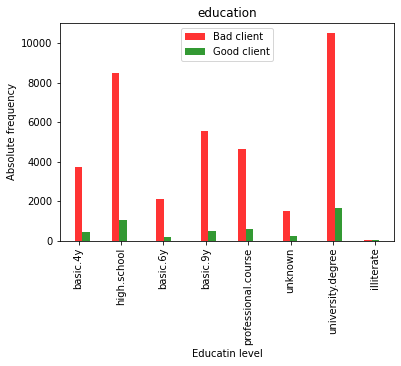

In [217]:
# Graph 'education' vs. 'target'
education_0 = df[df.target == 0].iloc[:,3:4]
education_1 = df[df.target == 1].iloc[:,3:4]

a = np.array(education_0)
b = np.array(education_1)

np.warnings.filterwarnings('ignore')

plt.hist(a, bins=40, color="r", alpha = 0.8, label='Bad client', align="left")
plt.hist(b, bins=40, color="g", alpha = 0.8, label='Good client', align="right")
plt.legend(loc='upper center')
plt.title('education', fontsize=12)
plt.xlabel('Educatin level')
plt.xticks(rotation='vertical')
plt.ylabel('Absolute frequency')
plt.show()

Variable: 'default'
Discription: has credit in default?
Type of variable: object
Total observations: 41188
Unique values: 3
List of unique values: ['no' 'unknown' 'yes']



Freq abs  percent %
no          32588      79.12
unknown      8597      20.87
yes             3       0.01

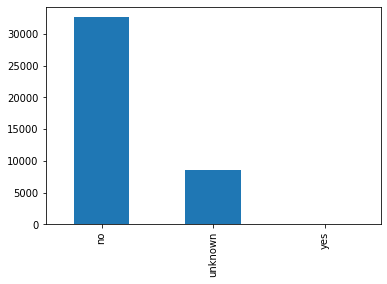

In [218]:
print("Variable: 'default'")
print("Discription: has credit in default?")
print(f"Type of variable: {df.default.dtype}")
print(f"Total observations: {df.default.shape[0]}")
print(f"Unique values: {df.default.nunique()}")
print(f"List of unique values: {df.default.unique()}")
print("")

# Graph "bar"
df['default'].value_counts(dropna=False).plot(kind='bar', figsize=(6,4));

# Number of observations by class
default_obs = df.default.value_counts()
default_o = pd.DataFrame(default_obs)
default_o.rename(columns={"default":"Freq abs"}, inplace=True)
default_o_pc = (df.default.value_counts(normalize=True) * 100).round(decimals=2)
default_obs_pc = pd.DataFrame(default_o_pc)
default_obs_pc.rename(columns={"default":"percent %"}, inplace=True)
default_obs = pd.concat([default_o,default_obs_pc], axis=1)
display(default_obs)

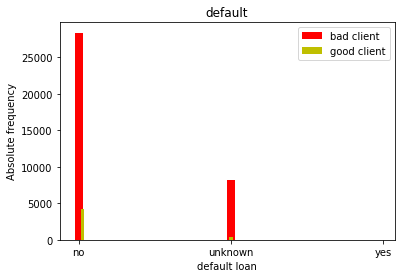

In [219]:
# Graph 'default' vs. 'target'
default_0 = df[df.target == 0].iloc[:,4:5]
default_1 = df[df.target == 1].iloc[:,4:5]

a = np.array(default_0)
b = np.array(default_1)

np.warnings.filterwarnings('ignore')

plt.hist(a, bins=40, color="r", alpha = 1, label='bad client', align="left")
plt.hist(b, bins=40, color="y", alpha = 1, label='good client', align="right")
plt.legend(loc='upper right')
plt.title('default', fontsize=12)
plt.xlabel('default loan')
plt.xticks(rotation='horizontal')
plt.ylabel('Absolute frequency')
plt.show()

Variable: 'housing'
Discription: has housing loan?
Type of variable: object
Total observations: 41188
Unique values: 3
List of unique values: ['no' 'yes' 'unknown']



Freq abs  percent %
yes         21576      52.38
no          18622      45.21
unknown       990       2.40

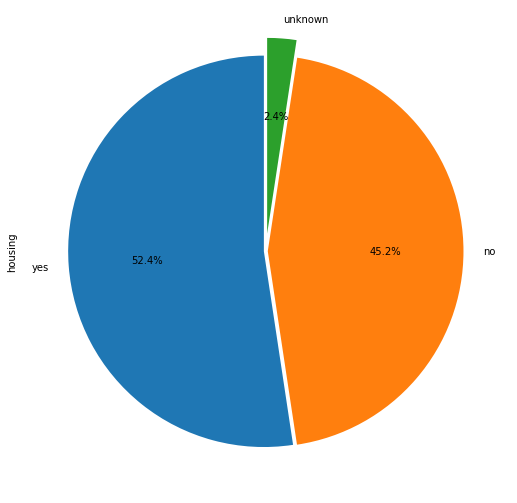

In [220]:
print("Variable: 'housing'")
print("Discription: has housing loan?")
print(f"Type of variable: {df.housing.dtype}")
print(f"Total observations: {df.housing.shape[0]}")
print(f"Unique values: {df.housing.nunique()}")
print(f"List of unique values: {df.housing.unique()}")
print("")

# Graph "pie"
df['housing'].value_counts(dropna=False).plot(kind='pie', 
                                              explode = (0.01, 0.01, 0.09), 
                                              figsize=(13,9), 
                                              autopct='%1.1f%%',
                                              startangle=90);

# Number of observations by class
hous_obs = df.housing.value_counts()
hous_o = pd.DataFrame(hous_obs)
hous_o.rename(columns={"housing":"Freq abs"}, inplace=True)
hous_o_pc = (df.housing.value_counts(normalize=True) * 100).round(decimals=2)
hous_obs_pc = pd.DataFrame(hous_o_pc)
hous_obs_pc.rename(columns={"housing":"percent %"}, inplace=True)
hous_obs = pd.concat([hous_o,hous_obs_pc], axis=1)
display(hous_obs)

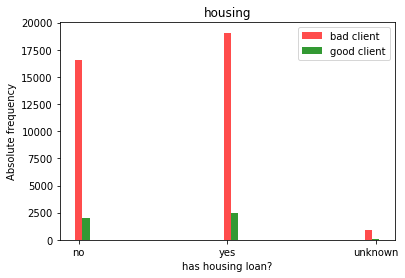

In [221]:
# Graph 'housing' vs. 'target'
housing_0 = df[df.target == 0].iloc[:,5:6]
housing_1 = df[df.target == 1].iloc[:,5:6]

a = np.array(housing_0)
b = np.array(housing_1)

np.warnings.filterwarnings('ignore')

plt.hist(a, bins=40, color="r", alpha = 0.7, label='bad client', align="left")
plt.hist(b, bins=40, color="g", alpha = 0.8, label='good client', align="right")
plt.legend(loc='upper right')
plt.title('housing', fontsize=12)
plt.xlabel('has housing loan?')
plt.xticks(rotation='horizontal')
plt.ylabel('Absolute frequency')
plt.show()

Variable: 'loan'
Discription: has personal loan?
Type of variable: object
Total observations: 41188
Unique values: 3
List of unique values: ['no' 'yes' 'unknown']



Freq abs  percent %
no          33950      82.43
yes          6248      15.17
unknown       990       2.40

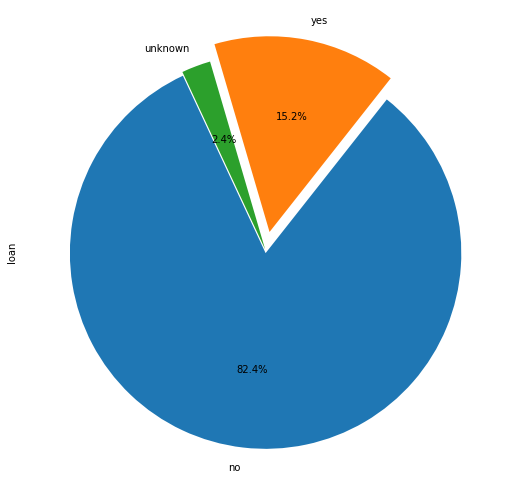

In [222]:
print("Variable: 'loan'")
print("Discription: has personal loan?")
print(f"Type of variable: {df.loan.dtype}")
print(f"Total observations: {df.loan.shape[0]}")
print(f"Unique values: {df.loan.nunique()}")
print(f"List of unique values: {df.loan.unique()}")
print("")

# Graph "pie"
df['loan'].value_counts(dropna=False).plot(kind='pie', 
                                                figsize=(13,9), 
                                                explode = (0.01, 0.1, 0.01),
                                                autopct='%1.1f%%',
                                                startangle=115);

# Number of observations by class
loan_obs = df.loan.value_counts()
loan_o = pd.DataFrame(loan_obs)
loan_o.rename(columns={"loan":"Freq abs"}, inplace=True)
loan_o_pc = (df.loan.value_counts(normalize=True) * 100).round(decimals=2)
loan_obs_pc = pd.DataFrame(loan_o_pc)
loan_obs_pc.rename(columns={"loan":"percent %"}, inplace=True)
loan_obs = pd.concat([loan_o,loan_obs_pc], axis=1)
display(loan_obs)

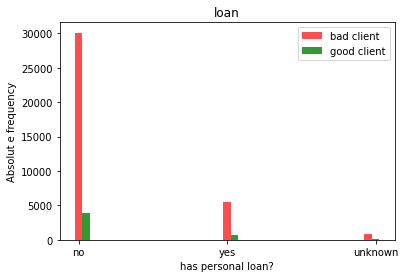

In [223]:
# Graph 'loan' vs. 'target'
loan_0 = df[df.target == 0].iloc[:,6:7]
loan_1 = df[df.target == 1].iloc[:,6:7]

a = np.array(loan_0)
b = np.array(loan_1)

np.warnings.filterwarnings('ignore')

plt.hist(a, bins=40, color="r", alpha = 0.7, label='bad client', align="left")
plt.hist(b, bins=40, color="g", alpha = 0.8, label='good client', align="right")
plt.legend(loc='upper right')
plt.title('loan', fontsize=12)
plt.xlabel('has personal loan?')
plt.xticks(rotation='horizontal')
plt.ylabel('Absolut e frequency')
plt.show()

Variable: 'poutcome'
Discription: outcome of the previous marketing campaign
Type of variable: object
Total observations: 41188
Unique values: 3
List of unique values: ['nonexistent' 'failure' 'success']



Freq abs  percent %
nonexistent     35563      86.34
failure          4252      10.32
success          1373       3.33

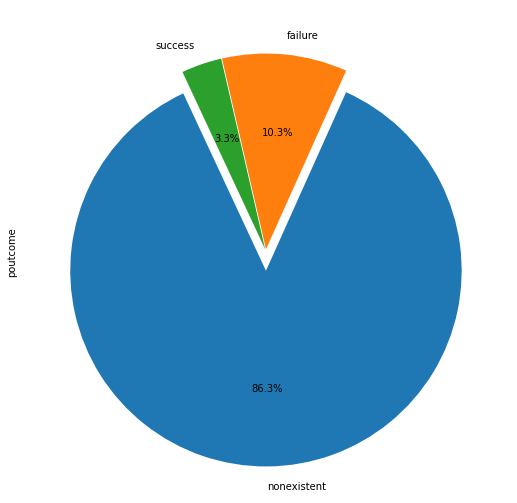

In [224]:
print("Variable: 'poutcome'")
print("Discription: outcome of the previous marketing campaign")
print(f"Type of variable: {df.poutcome.dtype}")
print(f"Total observations: {df.poutcome.shape[0]}")
print(f"Unique values: {df.poutcome.nunique()}")
print(f"List of unique values: {df.poutcome.unique()}")
print("")

# Graph "pie"
df['poutcome'].value_counts(dropna=False).plot(kind='pie', 
                                                figsize=(13,9), 
                                                explode = (0.1, 0.01, 0.01),
                                                autopct='%1.1f%%',
                                                startangle=115);

# Number of observations by class
pout_obs = df.poutcome.value_counts()
pout_o = pd.DataFrame(pout_obs)
pout_o.rename(columns={"poutcome":"Freq abs"}, inplace=True)
pout_o_pc = (df.poutcome.value_counts(normalize=True) * 100).round(decimals=2)
pout_obs_pc = pd.DataFrame(pout_o_pc)
pout_obs_pc.rename(columns={"poutcome":"percent %"}, inplace=True)
pout_obs = pd.concat([pout_o,pout_obs_pc], axis=1)
pout_obs

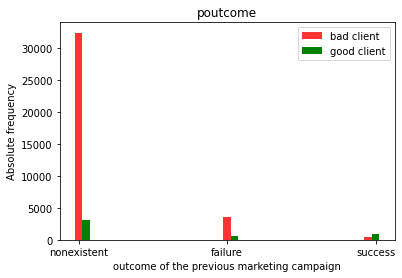

In [225]:
# Pivot_table
type_pivot = df.pivot_table(
    columns="target",
    index="poutcome",
    values="age", aggfunc=np.mean)

# Graph 'default' vs. 'target'
pout_0 = df[df.target == 0].iloc[:,9:10]
pout_1 = df[df.target == 1].iloc[:,9:10]

a = np.array(pout_0)
b = np.array(pout_1)

np.warnings.filterwarnings('ignore')

plt.hist(a, bins=40, color="r", alpha = 0.8, label='bad client', align="left")
plt.hist(b, bins=40, color="g", alpha = 1, label='good client', align="right")
plt.legend(loc='upper right')
plt.title('poutcome', fontsize=12)
plt.xlabel('outcome of the previous marketing campaign')
plt.xticks(rotation='horizontal')
plt.ylabel('Absolute frequency')
plt.show()

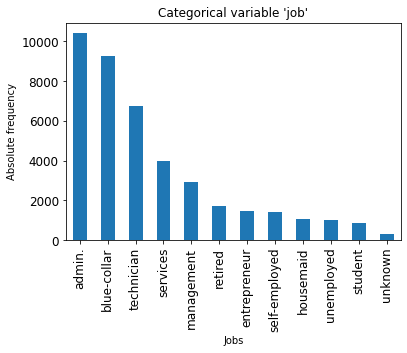

In [226]:
# Visualization of the categoric 'job'
data_count = df['job'].value_counts().plot(kind='bar', figsize=(6,4), fontsize=12)
plt.title('Categorical variable \'job\'', fontsize=12)
plt.xlabel('Jobs')
plt.ylabel('Absolute frequency')
plt.show()

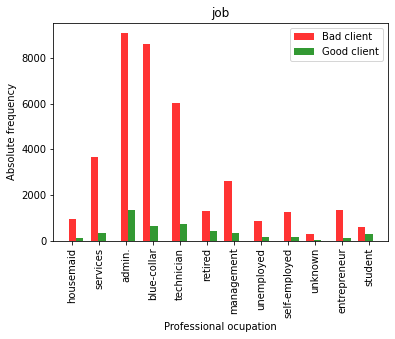

In [227]:
# Graph 'job' vs. 'target'
job_0 = df[df.target == 0].iloc[:,1:2]
job_1 = df[df.target == 1].iloc[:,1:2]

a = np.array(job_0)
b = np.array(job_1)

np.warnings.filterwarnings('ignore')

plt.hist(a, bins=40, color="r", alpha = 0.8, label='Bad client', align="left")
plt.hist(b, bins=40, color="g", alpha = 0.8, label='Good client', align="right")
plt.legend(loc='upper right')
plt.title('job', fontsize=12)
plt.xlabel('Professional ocupation')
plt.xticks(rotation='vertical')
plt.ylabel('Absolute frequency')
plt.show()


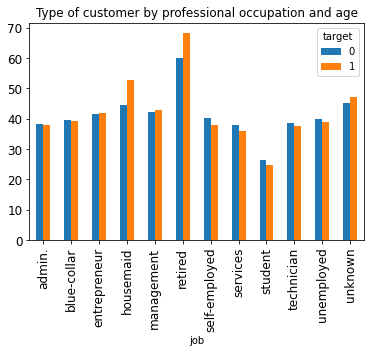

In [228]:
# Graph: type of customer by professional occupation and age
#Pivot_table
type_pivot = df.pivot_table(
    columns="target",
    index="job",
    values="age", aggfunc=np.mean)

# Display pivot_table
type_pivot.sort_values(by=["job"], 
                       ascending=True).plot(kind="bar", 
                                             title=("Type of customer by professional occupation and age"), 
                                             figsize=(6,4),
                                             fontsize = 12);

Variable: 'marital'
Discription: Marital situation
Type of variable: object
Total observations: 41188
Unique values: 4
List of unique values: ['married' 'single' 'divorced' 'unknown']



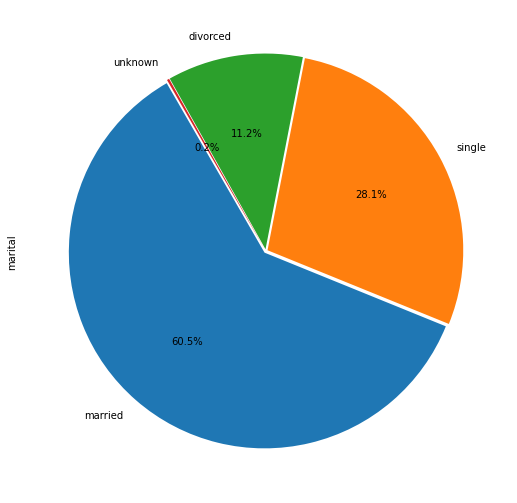

In [229]:
print("Variable: 'marital'")
print("Discription: Marital situation")
print(f"Type of variable: {df.marital.dtype}")
print(f"Total observations: {df.marital.shape[0]}")
print(f"Unique values: {df.marital.nunique()}")
print(f"List of unique values: {df.marital.unique()}")
print("")

# Graph "pie"
df['marital'].value_counts(dropna=False).plot(kind='pie', figsize=(14,9),
                                              explode = (0.01, 0.01, 0.01, 0.01),
                                              autopct='%1.1f%%',
                                              startangle=120);

Freq abs  percent %
married      24928      60.52
single       11568      28.09
divorced      4612      11.20
unknown         80       0.19

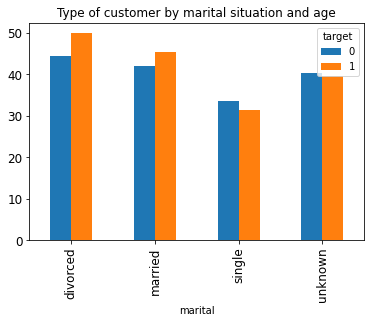

In [230]:
# Number of observations by class
marital_obs = df.marital.value_counts()
marital_o = pd.DataFrame(marital_obs)
marital_o.rename(columns={"marital":"Freq abs"}, inplace=True)
marital_o_pc = (df.marital.value_counts(normalize=True) * 100).round(decimals=2)
marital_obs_pc = pd.DataFrame(marital_o_pc)
marital_obs_pc.rename(columns={"marital":"percent %"}, inplace=True)
marital_obs = pd.concat([marital_o,marital_obs_pc], axis=1)
display(marital_obs)

# Graph: Type of customer by marital situation and age
# Pivot_table
type_pivot = df.pivot_table(
    columns="target",
    index="marital",
    values="age", aggfunc=np.mean)

# Display pivot_table
type_pivot.sort_values(by=["marital"], 
                       ascending=True).plot(kind="bar", 
                                             title=("Type of customer by marital situation and age"), 
                                             figsize=(6,4),
                                             fontsize = 12);

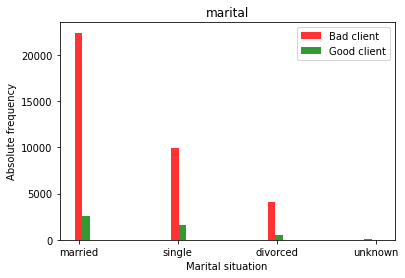

In [231]:
# Graph 'marital' vs. 'target'
marital_0 = df[df.target == 0].iloc[:,2:3]
marital_1 = df[df.target == 1].iloc[:,2:3]

a = np.array(marital_0)
b = np.array(marital_1)

np.warnings.filterwarnings('ignore')

plt.hist(a, bins=40, color="r", alpha = 0.8, label='Bad client', align="left")
plt.hist(b, bins=40, color="g", alpha = 0.8, label='Good client', align="right")
plt.legend(loc='upper right')
plt.title('marital', fontsize=12)
plt.xlabel('Marital situation')
plt.xticks(rotation='horizontal')
plt.ylabel('Absolute frequency')
plt.show()

Variable: 'education'
Discription: Education level
Type of variable: object
Total observations: 41188
Unique values: 8
List of unique values: ['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']



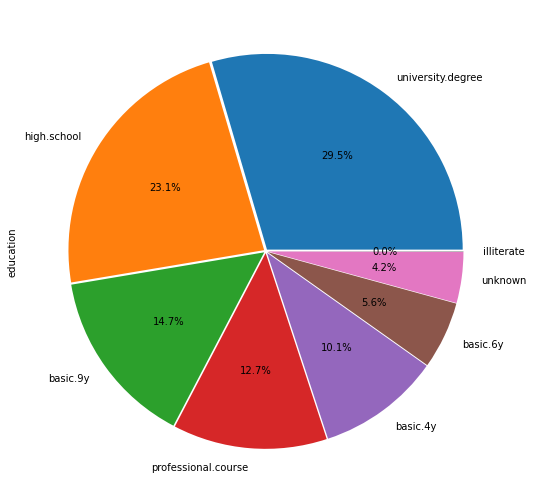

In [232]:
print("Variable: 'education'")
print("Discription: Education level")
print(f"Type of variable: {df.education.dtype}")
print(f"Total observations: {df.education.shape[0]}")
print(f"Unique values: {df.education.nunique()}")
print(f"List of unique values: {df.education.unique()}")
print("")

# Graph "pie"
df['education'].value_counts(dropna=False).plot(kind='pie', 
                                                figsize=(13,9), 
                                                explode = (0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01),
                                                autopct='%1.1f%%',
                                                startangle=0);


Freq abs  percent %
university.degree       12168      29.54
high.school              9515      23.10
basic.9y                 6045      14.68
professional.course      5243      12.73
basic.4y                 4176      10.14
basic.6y                 2292       5.56
unknown                  1731       4.20
illiterate                 18       0.04

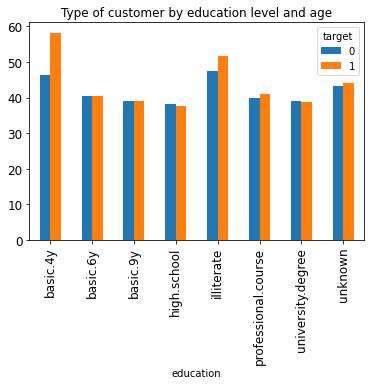

In [233]:
# Number of observations by class
edu_obs = df.education.value_counts()
edu_o = pd.DataFrame(edu_obs)
edu_o.rename(columns={"education":"Freq abs"}, inplace=True)
edu_o_pc = (df.education.value_counts(normalize=True) * 100).round(decimals=2)
edu_obs_pc = pd.DataFrame(edu_o_pc)
edu_obs_pc.rename(columns={"education":"percent %"}, inplace=True)
edu_obs = pd.concat([edu_o,edu_obs_pc], axis=1)
display(edu_obs)

# Graph: Type of customer by education level and age
# Pivot_table
type_pivot = df.pivot_table(
    columns="target",
    index="education",
    values="age", aggfunc=np.mean)

# Display pivot_table
type_pivot.sort_values(by=["education"], 
                       ascending=True).plot(kind="bar",
                                             title=("Type of customer by education level and age"), 
                                             figsize=(6,4),
                                             fontsize = 12);

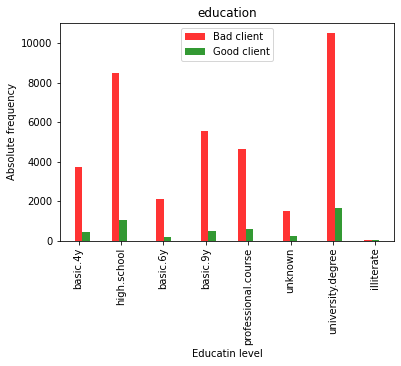

In [234]:
# Graph 'education' vs. 'target'
education_0 = df[df.target == 0].iloc[:,3:4]
education_1 = df[df.target == 1].iloc[:,3:4]

a = np.array(education_0)
b = np.array(education_1)

np.warnings.filterwarnings('ignore')

plt.hist(a, bins=40, color="r", alpha = 0.8, label='Bad client', align="left")
plt.hist(b, bins=40, color="g", alpha = 0.8, label='Good client', align="right")
plt.legend(loc='upper center')
plt.title('education', fontsize=12)
plt.xlabel('Educatin level')
plt.xticks(rotation='vertical')
plt.ylabel('Absolute frequency')
plt.show()

Variable: 'default'
Discription: has credit in default?
Type of variable: object
Total observations: 41188
Unique values: 3
List of unique values: ['no' 'unknown' 'yes']



Freq abs  percent %
no          32588      79.12
unknown      8597      20.87
yes             3       0.01

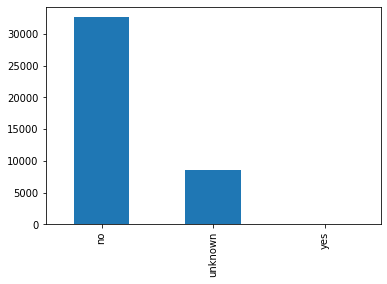

In [235]:
print("Variable: 'default'")
print("Discription: has credit in default?")
print(f"Type of variable: {df.default.dtype}")
print(f"Total observations: {df.default.shape[0]}")
print(f"Unique values: {df.default.nunique()}")
print(f"List of unique values: {df.default.unique()}")
print("")

# Graph "bar"
df['default'].value_counts(dropna=False).plot(kind='bar', figsize=(6,4));

# Number of observations by class
default_obs = df.default.value_counts()
default_o = pd.DataFrame(default_obs)
default_o.rename(columns={"default":"Freq abs"}, inplace=True)
default_o_pc = (df.default.value_counts(normalize=True) * 100).round(decimals=2)
default_obs_pc = pd.DataFrame(default_o_pc)
default_obs_pc.rename(columns={"default":"percent %"}, inplace=True)
default_obs = pd.concat([default_o,default_obs_pc], axis=1)
display(default_obs)

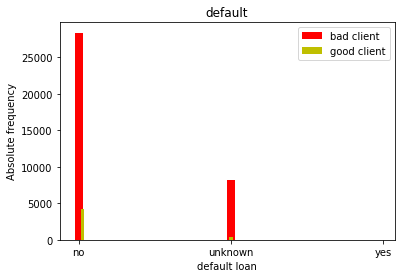

In [236]:
# Graph 'default' vs. 'target'
default_0 = df[df.target == 0].iloc[:,4:5]
default_1 = df[df.target == 1].iloc[:,4:5]

a = np.array(default_0)
b = np.array(default_1)

np.warnings.filterwarnings('ignore')

plt.hist(a, bins=40, color="r", alpha = 1, label='bad client', align="left")
plt.hist(b, bins=40, color="y", alpha = 1, label='good client', align="right")
plt.legend(loc='upper right')
plt.title('default', fontsize=12)
plt.xlabel('default loan')
plt.xticks(rotation='horizontal')
plt.ylabel('Absolute frequency')
plt.show()

Variable: 'housing'
Discription: has housing loan?
Type of variable: object
Total observations: 41188
Unique values: 3
List of unique values: ['no' 'yes' 'unknown']



Freq abs  percent %
yes         21576      52.38
no          18622      45.21
unknown       990       2.40

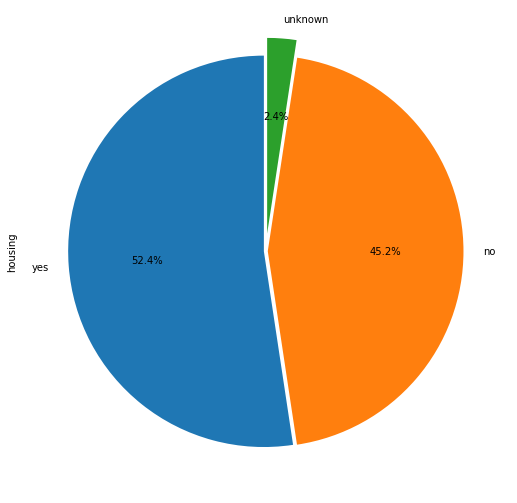

In [237]:
print("Variable: 'housing'")
print("Discription: has housing loan?")
print(f"Type of variable: {df.housing.dtype}")
print(f"Total observations: {df.housing.shape[0]}")
print(f"Unique values: {df.housing.nunique()}")
print(f"List of unique values: {df.housing.unique()}")
print("")

# Graph "pie"
df['housing'].value_counts(dropna=False).plot(kind='pie', 
                                              explode = (0.01, 0.01, 0.09), 
                                              figsize=(13,9), 
                                              autopct='%1.1f%%',
                                              startangle=90);

# Number of observations by class
hous_obs = df.housing.value_counts()
hous_o = pd.DataFrame(hous_obs)
hous_o.rename(columns={"housing":"Freq abs"}, inplace=True)
hous_o_pc = (df.housing.value_counts(normalize=True) * 100).round(decimals=2)
hous_obs_pc = pd.DataFrame(hous_o_pc)
hous_obs_pc.rename(columns={"housing":"percent %"}, inplace=True)
hous_obs = pd.concat([hous_o,hous_obs_pc], axis=1)
display(hous_obs)

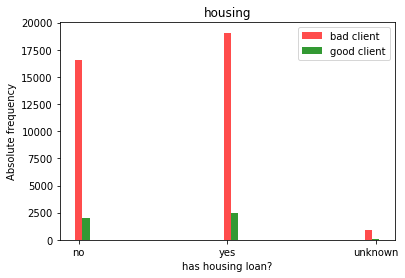

In [238]:
# Graph 'housing' vs. 'target'
housing_0 = df[df.target == 0].iloc[:,5:6]
housing_1 = df[df.target == 1].iloc[:,5:6]

a = np.array(housing_0)
b = np.array(housing_1)

np.warnings.filterwarnings('ignore')

plt.hist(a, bins=40, color="r", alpha = 0.7, label='bad client', align="left")
plt.hist(b, bins=40, color="g", alpha = 0.8, label='good client', align="right")
plt.legend(loc='upper right')
plt.title('housing', fontsize=12)
plt.xlabel('has housing loan?')
plt.xticks(rotation='horizontal')
plt.ylabel('Absolute frequency')
plt.show()

Variable: 'loan'
Discription: has personal loan?
Type of variable: object
Total observations: 41188
Unique values: 3
List of unique values: ['no' 'yes' 'unknown']



Freq abs  percent %
no          33950      82.43
yes          6248      15.17
unknown       990       2.40

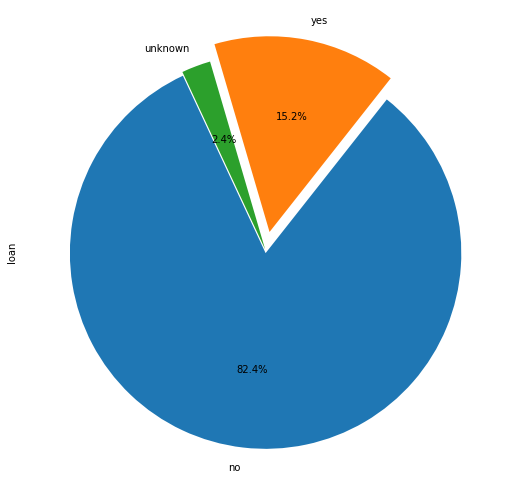

In [239]:
print("Variable: 'loan'")
print("Discription: has personal loan?")
print(f"Type of variable: {df.loan.dtype}")
print(f"Total observations: {df.loan.shape[0]}")
print(f"Unique values: {df.loan.nunique()}")
print(f"List of unique values: {df.loan.unique()}")
print("")

# Graph "pie"
df['loan'].value_counts(dropna=False).plot(kind='pie', 
                                                figsize=(13,9), 
                                                explode = (0.01, 0.1, 0.01),
                                                autopct='%1.1f%%',
                                                startangle=115);

# Number of observations by class
loan_obs = df.loan.value_counts()
loan_o = pd.DataFrame(loan_obs)
loan_o.rename(columns={"loan":"Freq abs"}, inplace=True)
loan_o_pc = (df.loan.value_counts(normalize=True) * 100).round(decimals=2)
loan_obs_pc = pd.DataFrame(loan_o_pc)
loan_obs_pc.rename(columns={"loan":"percent %"}, inplace=True)
loan_obs = pd.concat([loan_o,loan_obs_pc], axis=1)
display(loan_obs)

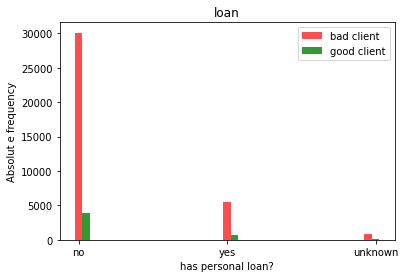

In [240]:
# Graph 'loan' vs. 'target'
loan_0 = df[df.target == 0].iloc[:,6:7]
loan_1 = df[df.target == 1].iloc[:,6:7]

a = np.array(loan_0)
b = np.array(loan_1)

np.warnings.filterwarnings('ignore')

plt.hist(a, bins=40, color="r", alpha = 0.7, label='bad client', align="left")
plt.hist(b, bins=40, color="g", alpha = 0.8, label='good client', align="right")
plt.legend(loc='upper right')
plt.title('loan', fontsize=12)
plt.xlabel('has personal loan?')
plt.xticks(rotation='horizontal')
plt.ylabel('Absolut e frequency')
plt.show()

Variable: 'poutcome'
Discription: outcome of the previous marketing campaign
Type of variable: object
Total observations: 41188
Unique values: 3
List of unique values: ['nonexistent' 'failure' 'success']



Freq abs  percent %
nonexistent     35563      86.34
failure          4252      10.32
success          1373       3.33

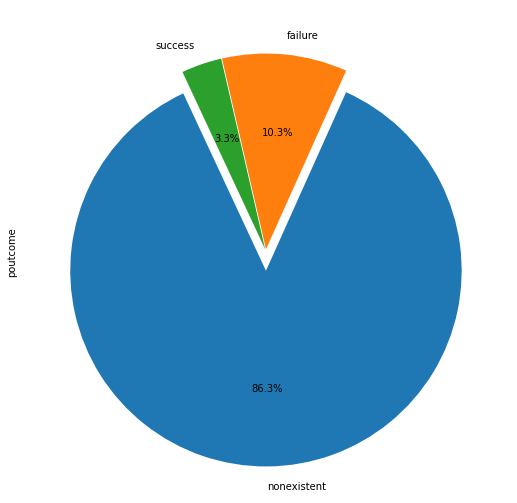

In [241]:
print("Variable: 'poutcome'")
print("Discription: outcome of the previous marketing campaign")
print(f"Type of variable: {df.poutcome.dtype}")
print(f"Total observations: {df.poutcome.shape[0]}")
print(f"Unique values: {df.poutcome.nunique()}")
print(f"List of unique values: {df.poutcome.unique()}")
print("")

# Graph "pie"
df['poutcome'].value_counts(dropna=False).plot(kind='pie', 
                                                figsize=(13,9), 
                                                explode = (0.1, 0.01, 0.01),
                                                autopct='%1.1f%%',
                                                startangle=115);

# Number of observations by class
pout_obs = df.poutcome.value_counts()
pout_o = pd.DataFrame(pout_obs)
pout_o.rename(columns={"poutcome":"Freq abs"}, inplace=True)
pout_o_pc = (df.poutcome.value_counts(normalize=True) * 100).round(decimals=2)
pout_obs_pc = pd.DataFrame(pout_o_pc)
pout_obs_pc.rename(columns={"poutcome":"percent %"}, inplace=True)
pout_obs = pd.concat([pout_o,pout_obs_pc], axis=1)
pout_obs

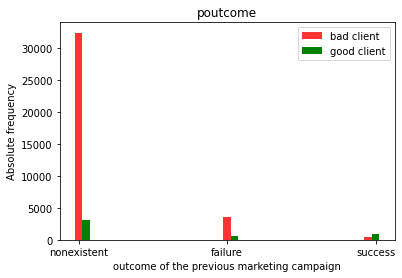

In [242]:
# Pivot_table
type_pivot = df.pivot_table(
    columns="target",
    index="poutcome",
    values="age", aggfunc=np.mean)

# Graph 'default' vs. 'target'
pout_0 = df[df.target == 0].iloc[:,9:10]
pout_1 = df[df.target == 1].iloc[:,9:10]

a = np.array(pout_0)
b = np.array(pout_1)

np.warnings.filterwarnings('ignore')

plt.hist(a, bins=40, color="r", alpha = 0.8, label='bad client', align="left")
plt.hist(b, bins=40, color="g", alpha = 1, label='good client', align="right")
plt.legend(loc='upper right')
plt.title('poutcome', fontsize=12)
plt.xlabel('outcome of the previous marketing campaign')
plt.xticks(rotation='horizontal')
plt.ylabel('Absolute frequency')
plt.show()

#Setting-up numeric (df_num) and categoric (df_cat) dataframes

In [243]:
# Renaming some columns for better typing and calling variables
df.rename(columns={"emp.var.rate":"emp_var_rate", "cons.price.idx":"cons_price_idx", "cons.conf.idx":"cons_conf_idx", "nr.employed":"nr_employed"}, inplace=True)
df.head()

age        job  marital    education  default housing loan  pdays  \
0   56  housemaid  married     basic.4y       no      no   no    999   
1   57   services  married  high.school  unknown      no   no    999   
2   37   services  married  high.school       no     yes   no    999   
3   40     admin.  married     basic.6y       no      no   no    999   
4   56   services  married  high.school       no      no  yes    999   

   previous     poutcome  emp_var_rate  cons_price_idx  cons_conf_idx  \
0         0  nonexistent           1.1          93.994          -36.4   
1         0  nonexistent           1.1          93.994          -36.4   
2         0  nonexistent           1.1          93.994          -36.4   
3         0  nonexistent           1.1          93.994          -36.4   
4         0  nonexistent           1.1          93.994          -36.4   

   euribor3m  nr_employed  target  
0      4.857       5191.0       0  
1      4.857       5191.0       0  
2      4.857       5191.0       0  
3      4.857       5191.0       0  
4      4.857       5191.0       0

In [244]:
# Numeric dataframe
df_num = df.copy()
df_num = df.select_dtypes(include=["float64","int64"])

# Categoric dataframe
df_cat = df.copy()
df_cat = df.select_dtypes(exclude=["float64","int64"])

#**Correlations**

#Numeric variables (df_num)

In [245]:
# Subdivision of target
ynum = df_num.target
Xnum = df_num.drop(["target"], axis= "columns")

In [246]:
# Identifying variables with predictive power (Pearson Correlation p-value)
pd.DataFrame(
    [scipy.stats.pearsonr(Xnum[col], ynum) for col in Xnum.columns],
    columns=["Pearson Corr.", "p-value"],
    index=Xnum.columns,
).round(2)

Pearson Corr.  p-value
age                      0.03      0.0
pdays                   -0.32      0.0
previous                 0.23      0.0
emp_var_rate            -0.30      0.0
cons_price_idx          -0.14      0.0
cons_conf_idx            0.05      0.0
euribor3m               -0.31      0.0
nr_employed             -0.35      0.0

All variables have predictive power.

Strategy: No transformation.

In [247]:
# Numeric variables with higher monotonicity (spearman)
df_spearman = df_num.copy()
df_spearman.drop(["target"], axis=1, inplace=True)

#Outliers, Missing Values, Anomalies e Transformations

Numeric variables (df_num)

In [248]:
# Removing Target and making a copy
df_drop = df_num.drop(["target"], axis=1).copy()

age       pdays  previous  emp_var_rate  cons_price_idx  \
mean  40.02406  962.475454  0.172963      0.081886       93.575664   
50%   38.00000  999.000000  0.000000      1.100000       93.749000   
std   10.42125  186.910907  0.494901      1.570960        0.578840   

      cons_conf_idx  euribor3m  nr_employed  
mean     -40.502600   3.621291  5167.035911  
50%      -41.800000   4.857000  5191.000000  
std        4.628198   1.734447    72.251528

Any missing values: False



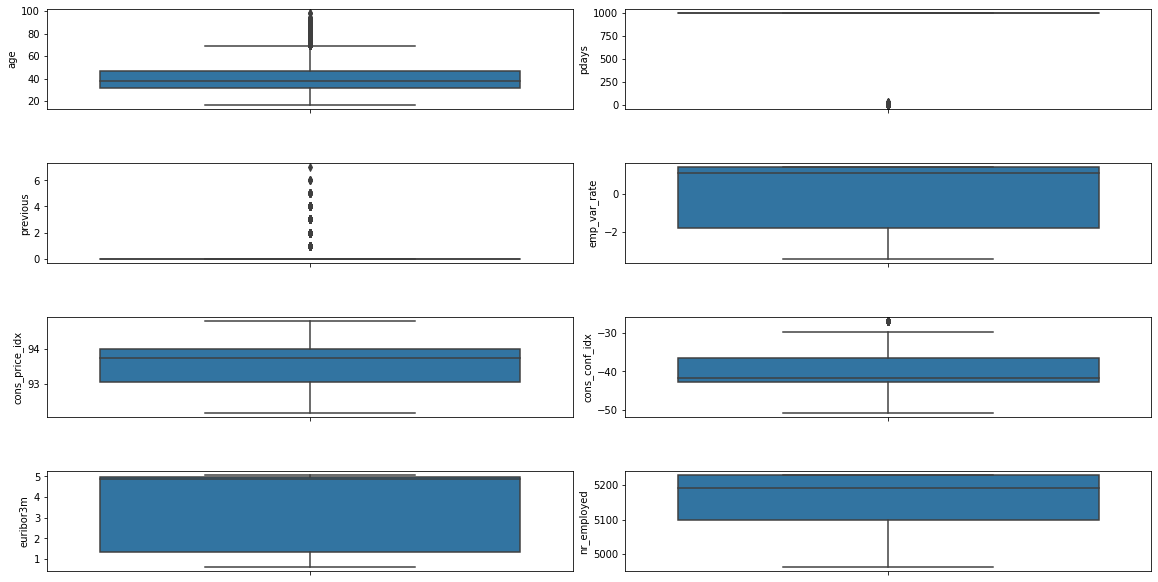

In [249]:
# Visualization of numerical data dispersion (Boxplot)
fig, axs = plt.subplots(ncols=2, nrows=4, figsize=(16, 8))
index = 0
axs = axs.flatten()
for k,v in df_drop.items():
    sns.boxplot(y=k, data=df_drop, ax=axs[index], orient="h")
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

display(df_drop.describe().loc[["mean","50%","std"]])
print(f"Any missing values: {df_drop.isnull().values.any()}")
print("")

From the analysis of the dispersion of the numeric data, it seems to be no outliers. The scattered data of 'age' has a normal behavior and I assume that the extreme datapoints in the variable 'pdays' are 'out of range' values, as for the rest every variables seem to have a balanced body.

Regarding missing values and other anomalies, all numerical variables were analyzed for their unique values and respective counts and there seems to be no missing values or any other anomalies.

Next, categorical variables will be analyzed.

#Categoric veriables (df_cat_t)

Anomalies treatment and transformation into numerics through various techniques that will be analyzed case by case

In [250]:
# Creating a copy
df_cat_t = df_cat.copy()
df_cat.describe() # Describing the categorical dataframe 

job  marital          education default housing   loan     poutcome
count    41188    41188              41188   41188   41188  41188        41188
unique      12        4                  8       3       3      3            3
top     admin.  married  university.degree      no     yes     no  nonexistent
freq     10422    24928              12168   32588   21576  33950        35563

Variable: job

In [251]:
print(f"Unique values: {df_cat.job.nunique()}")
print("")

# Observations by class
num_obs = df_cat.job.value_counts()
num_o = pd.DataFrame(num_obs)
num_o.rename(columns={"job":"Freq abs"}, inplace=True)
num_o_pc = (df_cat.job.value_counts(normalize=True) * 100).round(decimals=2)
num_obs_pc = pd.DataFrame(num_o_pc)
num_obs_pc.rename(columns={"job":"percent %"}, inplace=True)
n_obs = pd.concat([num_o,num_obs_pc], axis=1)
display(n_obs)

Unique values: 12



Freq abs  percent %
admin.            10422      25.30
blue-collar        9254      22.47
technician         6743      16.37
services           3969       9.64
management         2924       7.10
retired            1720       4.18
entrepreneur       1456       3.54
self-employed      1421       3.45
housemaid          1060       2.57
unemployed         1014       2.46
student             875       2.12
unknown             330       0.80

In this case, 'unknown' are interpreted as missing values.

Strategy: Replacing by the most frequent value.

Unique values: 11


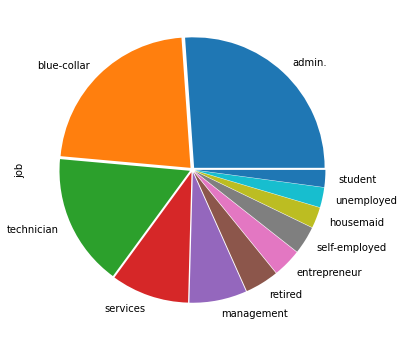

In [252]:
# Replacing 'unknown' by NaN
df_cat_t.job.replace(to_replace="unknown", value=np.nan, inplace=True)

# Imputation missing values by the modal value
df_cat_t['job'] = df_cat_t.job.fillna(df_cat_t.job.value_counts().index[0])

# Confirming and visualizing of "job"
df_cat_t.job.value_counts(dropna=False).plot(kind='pie', figsize=(10,6), 
                                           explode=(0.02, 0.02, 0.02, 0.02, 
                                                    0.02, 0.02, 0.02, 0.02,
                                                    0.02, 0.02, 0.02));
print(f"Unique values: {df_cat_t.job.nunique()}")

Encoded by dummies method and numeric tranformation

In [253]:
# Encoding 'job' OHE or BIN
df_job = df_cat_t.job
job_ohe = pd.get_dummies(df_job)
binary_encoder_job = BinaryEncoder()
job_bin = binary_encoder_job.fit_transform(df_job)
print(f'''
*Results*
job OHE: {job_ohe.shape[1]} columns
job BIN: {job_bin.shape[1]} columns''')


*Results*
job OHE: 11 columns
job BIN: 4 columns


In [254]:
# Removing 'job' and concatenation job_ohe
df_cat_t.drop(["job"],axis=1,inplace=True)
df_cat_t = pd.concat([df_cat_t,job_ohe],axis=1)
display(df_cat_t.head(2))
display(df_cat_t.shape)

marital    education  default housing loan     poutcome  admin.  \
0  married     basic.4y       no      no   no  nonexistent       0   
1  married  high.school  unknown      no   no  nonexistent       0   

   blue-collar  entrepreneur  housemaid  management  retired  self-employed  \
0            0             0          1           0        0              0   
1            0             0          0           0        0              0   

   services  student  technician  unemployed  
0         0        0           0           0  
1         1        0           0           0

(41188, 17)

Variable: marital

In [255]:
print(f"Unique values: {df_cat.marital.nunique()}")
print("")

# Observations by class
marital_obs = df_cat.marital.value_counts()
marital_o = pd.DataFrame(marital_obs)
marital_o.rename(columns={"marital":"Freq abs"}, inplace=True)
marital_o_pc = (df_cat.marital.value_counts(normalize=True) * 100).round(decimals=2)
marital_obs_pc = pd.DataFrame(marital_o_pc)
marital_obs_pc.rename(columns={"marital":"percent %"}, inplace=True)
marital_obs = pd.concat([marital_o,marital_obs_pc], axis=1)
display(marital_obs)

Unique values: 4



Freq abs  percent %
married      24928      60.52
single       11568      28.09
divorced      4612      11.20
unknown         80       0.19

Unique values: 3



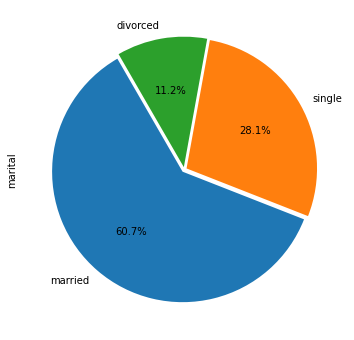

In [256]:
# Replacing 'unknown' by NaN
df_cat_t.marital.replace(to_replace="unknown", value=np.nan, inplace=True)

# Imputation of missing values by modal value
df_cat_t['marital'] = df_cat_t.marital.fillna(df_cat_t.marital.value_counts().index[0])

# Graph "pie"
df_cat_t['marital'].value_counts(dropna=False).plot(kind='pie', figsize=(10,6),
                                              explode = (0.02, 0.02, 0.02),
                                              autopct='%1.1f%%',
                                              startangle=120);
print(f"Unique values: {df_cat_t.marital.nunique()}")
print("")

In [257]:
# marital
df_marital = df_cat_t.marital
marital_ohe = pd.get_dummies(df_marital)
binary_encoder_marital = BinaryEncoder()
marital_bin = binary_encoder_marital.fit_transform(df_marital)
print(f'''
*Results*
marital OHE: {marital_ohe.shape[1]} columns''')


*Results*
marital OHE: 3 columns


In [258]:
df_cat_t.drop(["marital"],axis=1,inplace=True)
df_cat_t = pd.concat([df_cat_t,marital_ohe],axis=1)
display(df_cat_t.head(2))
display(df_cat_t.shape)

education  default housing loan     poutcome  admin.  blue-collar  \
0     basic.4y       no      no   no  nonexistent       0            0   
1  high.school  unknown      no   no  nonexistent       0            0   

   entrepreneur  housemaid  management  retired  self-employed  services  \
0             0          1           0        0              0         0   
1             0          0           0        0              0         1   

   student  technician  unemployed  divorced  married  single  
0        0           0           0         0        1       0  
1        0           0           0         0        1       0

(41188, 19)

Variable: education

In [259]:
print(f"Unique values: {df_cat.education.nunique()}")
print("")

# Observations by class
edu_obs = df_cat.education.value_counts()
edu_o = pd.DataFrame(edu_obs)
edu_o.rename(columns={"education":"Freq abs"}, inplace=True)
edu_o_pc = (df_cat.education.value_counts(normalize=True) * 100).round(decimals=2)
edu_obs_pc = pd.DataFrame(edu_o_pc)
edu_obs_pc.rename(columns={"education":"percent %"}, inplace=True)
edu_obs = pd.concat([edu_o,edu_obs_pc], axis=1)
display(edu_obs)

Unique values: 8



Freq abs  percent %
university.degree       12168      29.54
high.school              9515      23.10
basic.9y                 6045      14.68
professional.course      5243      12.73
basic.4y                 4176      10.14
basic.6y                 2292       5.56
unknown                  1731       4.20
illiterate                 18       0.04

Unique values: 7



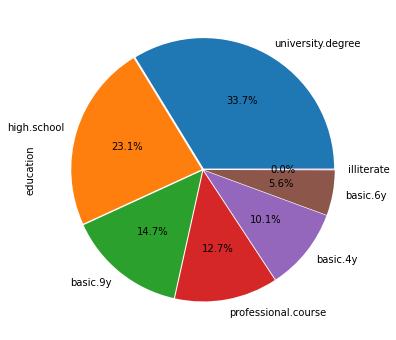

In [260]:
# Replacing 'unknown' by NaN
df_cat_t.education.replace(to_replace="unknown", value=np.nan, inplace=True)

# Imputation of missing values by modal value
df_cat_t['education'] = df_cat_t.education.fillna(df_cat_t.education.value_counts().index[0])

# Graph "pie"
df_cat_t['education'].value_counts(dropna=False).plot(kind='pie', 
                                                figsize=(10,6), 
                                                explode = (0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01),
                                                autopct='%1.1f%%',
                                                startangle=0);
print(f"Unique values: {df_cat_t.education.nunique()}")
print("")

In [261]:
df_cat_t.education.value_counts()

university.degree      13899
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
illiterate                18
Name: education, dtype: int64

In [262]:
df_cat_t["education"] = df_cat_t.education.map({"university.degree":7, 
                                                "professional.course":6,
                                                "high.school":5,"basic.9y":4,
                                                "basic.6y":3, "basic.4y":2,
                                                "illiterate":1 })
display(df_cat_t.education.value_counts())
display(df_cat_t.head(2))
display(df_cat_t.shape)

7    13899
5     9515
4     6045
6     5243
2     4176
3     2292
1       18
Name: education, dtype: int64

education  default housing loan     poutcome  admin.  blue-collar  \
0          2       no      no   no  nonexistent       0            0   
1          5  unknown      no   no  nonexistent       0            0   

   entrepreneur  housemaid  management  retired  self-employed  services  \
0             0          1           0        0              0         0   
1             0          0           0        0              0         1   

   student  technician  unemployed  divorced  married  single  
0        0           0           0         0        1       0  
1        0           0           0         0        1       0

(41188, 19)

Variable: default

Unique values: 3



Freq abs  percent %
no          32588      79.12
unknown      8597      20.87
yes             3       0.01

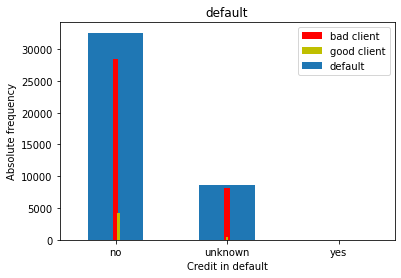

In [263]:
print(f"Unique values: {df.default.nunique()}")
print("")

# Visualizing graph "bar"
df['default'].value_counts(dropna=False).plot(kind='bar', figsize=(6,4));

# Number of observations by class
default_obs = df.default.value_counts()
default_o = pd.DataFrame(default_obs)
default_o.rename(columns={"default":"Freq abs"}, inplace=True)
default_o_pc = (df.default.value_counts(normalize=True) * 100).round(decimals=2)
default_obs_pc = pd.DataFrame(default_o_pc)
default_obs_pc.rename(columns={"default":"percent %"}, inplace=True)
default_obs = pd.concat([default_o,default_obs_pc], axis=1)
display(default_obs)


# Graph 'default' vs. 'target'
default_0 = df[df.target == 0].iloc[:,4:5]
default_1 = df[df.target == 1].iloc[:,4:5]

a = np.array(default_0)
b = np.array(default_1)

np.warnings.filterwarnings('ignore')

plt.hist(a, bins=40, color="r", alpha = 1, label='bad client', align="left")
plt.hist(b, bins=40, color="y", alpha = 1, label='good client', align="right")
plt.legend(loc='upper right')
plt.title('default', fontsize=12)
plt.xlabel('Credit in default')
plt.xticks(rotation='horizontal')
plt.ylabel('Absolute frequency')
plt.show()

In this case, 'unknown' are interpreted as missing values. The 'yes' class is meaningless and any imputation to the missing values would deeply compromise its meaning.

Strategy: Remove variable.

In [264]:
df_cat_t.drop(["default"], axis=1, inplace=True)
display(df_cat_t.head(2))
display(df_cat_t.shape)

education housing loan     poutcome  admin.  blue-collar  entrepreneur  \
0          2      no   no  nonexistent       0            0             0   
1          5      no   no  nonexistent       0            0             0   

   housemaid  management  retired  self-employed  services  student  \
0          1           0        0              0         0        0   
1          0           0        0              0         1        0   

   technician  unemployed  divorced  married  single  
0           0           0         0        1       0  
1           0           0         0        1       0

(41188, 18)

Variable: housing

In [265]:
print(f"Unique values: {df_cat.housing.nunique()}")
print("")

# Observations by class
hous_obs = df_cat.housing.value_counts()
hous_o = pd.DataFrame(hous_obs)
hous_o.rename(columns={"housing":"Freq abs"}, inplace=True)
hous_o_pc = (df_cat.housing.value_counts(normalize=True) * 100).round(decimals=2)
hous_obs_pc = pd.DataFrame(hous_o_pc)
hous_obs_pc.rename(columns={"housing":"percent %"}, inplace=True)
hous_obs = pd.concat([hous_o,hous_obs_pc], axis=1)
display(hous_obs)

Unique values: 3



Freq abs  percent %
yes         21576      52.38
no          18622      45.21
unknown       990       2.40

In this case, 'unknown' are interpreted as missing values.

Strategy: Replacing by the most frequent value.

Unique values: 2



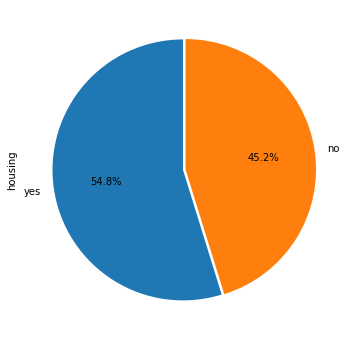

In [266]:
# Replacing 'unknown' by NaN
df_cat_t.housing.replace(to_replace="unknown", value=np.nan, inplace=True)

# Imputation of missing values by modal value
df_cat_t['housing'] = df_cat_t.housing.fillna(df_cat_t.housing.value_counts().index[0])

# Visualizing "pie" graph
df_cat_t['housing'].value_counts(dropna=False).plot(kind='pie', 
                                              explode = (0.01, 0.01), 
                                              figsize=(10,6), 
                                              autopct='%1.1f%%',
                                              startangle=90);
print(f"Unique values: {df_cat_t.housing.nunique()}")
print("")

For the Chi-square test, this variable has revealed has with little statistic importance.

Strategy: Remove variable.

In [267]:
df_cat_t.drop(["housing"], axis=1, inplace=True)
display(df_cat_t.head(2))
display(df_cat_t.shape)

education loan     poutcome  admin.  blue-collar  entrepreneur  housemaid  \
0          2   no  nonexistent       0            0             0          1   
1          5   no  nonexistent       0            0             0          0   

   management  retired  self-employed  services  student  technician  \
0           0        0              0         0        0           0   
1           0        0              0         1        0           0   

   unemployed  divorced  married  single  
0           0         0        1       0  
1           0         0        1       0

(41188, 17)

Variable: loan

In [268]:
print(f"Unique values: {df_cat.loan.nunique()}")
print("")

# Observations by class
loan_obs = df_cat.loan.value_counts()
loan_o = pd.DataFrame(loan_obs)
loan_o.rename(columns={"loan":"Freq abs"}, inplace=True)
loan_o_pc = (df_cat.loan.value_counts(normalize=True) * 100).round(decimals=2)
loan_obs_pc = pd.DataFrame(loan_o_pc)
loan_obs_pc.rename(columns={"loan":"percent %"}, inplace=True)
loan_obs = pd.concat([loan_o,loan_obs_pc], axis=1)
display(loan_obs)

Unique values: 3



Freq abs  percent %
no          33950      82.43
yes          6248      15.17
unknown       990       2.40

In this case, 'unknown' are interpreted as missing values.

Strategy: Replacing by the most frequent value.

Unique values: 2



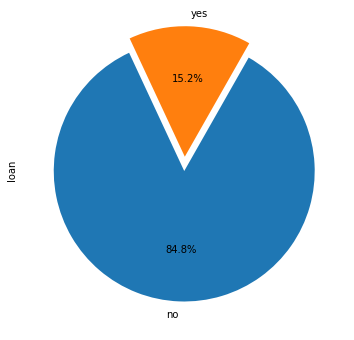

In [269]:
# Replacing 'unknown' by NaN
df_cat_t.loan.replace(to_replace="unknown", value=np.nan, inplace=True)

# Imputation of missing values by modal value
df_cat_t['loan'] = df_cat_t.loan.fillna(df_cat_t.loan.value_counts().index[0])

# Visualizing "pie" graph
df_cat_t['loan'].value_counts(dropna=False).plot(kind='pie', 
                                                figsize=(10,6), 
                                                explode = (0.01, 0.1),
                                                autopct='%1.1f%%',
                                                startangle=115);
print(f"Unique values: {df_cat_t.loan.nunique()}")
print("")

Strategy: Remove variable.

In [270]:
df_cat_t.drop(["loan"], axis=1, inplace=True)
display(df_cat_t.head(2))
display(df_cat_t.shape)

education     poutcome  admin.  blue-collar  entrepreneur  housemaid  \
0          2  nonexistent       0            0             0          1   
1          5  nonexistent       0            0             0          0   

   management  retired  self-employed  services  student  technician  \
0           0        0              0         0        0           0   
1           0        0              0         1        0           0   

   unemployed  divorced  married  single  
0           0         0        1       0  
1           0         0        1       0

(41188, 16)

Variable: poutcome

Unique values: 3



Freq abs  percent %
nonexistent     35563      86.34
failure          4252      10.32
success          1373       3.33

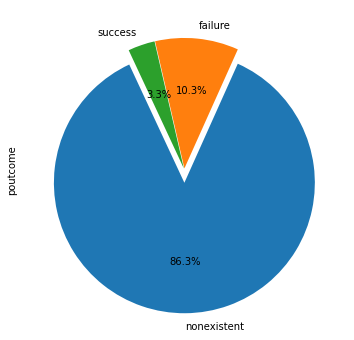

In [271]:
print(f"Unique values: {df_cat.poutcome.nunique()}")
print("")

# Graph "pie"
df['poutcome'].value_counts(dropna=False).plot(kind='pie', 
                                                figsize=(10,6), 
                                                explode = (0.1, 0.01, 0.01),
                                                autopct='%1.1f%%',
                                                startangle=115);

# Number of observation by class
pout_obs = df.poutcome.value_counts()
pout_o = pd.DataFrame(pout_obs)
pout_o.rename(columns={"poutcome":"Freq abs"}, inplace=True)
pout_o_pc = (df.poutcome.value_counts(normalize=True) * 100).round(decimals=2)
pout_obs_pc = pd.DataFrame(pout_o_pc)
pout_obs_pc.rename(columns={"poutcome":"percent %"}, inplace=True)
pout_obs = pd.concat([pout_o,pout_obs_pc], axis=1)
pout_obs

In this case, 'nonexistent' values are interpreted has relevant values.

Strategy: No transformation.
Encoded by dummies method and numeric tranformation

In [272]:
# Encoding 'poutcome' OHE
df_poutcome = df_cat_t.poutcome
poutcome_ohe = pd.get_dummies(df_poutcome)
binary_encoder_poutcome = BinaryEncoder()
poutcome_bin = binary_encoder_poutcome.fit_transform(df_poutcome)
print(f'''
*Results*
poutcome OHE: {poutcome_ohe.shape[1]} columns''')


*Results*
poutcome OHE: 3 columns


In [273]:
# Remove 'poutcome' and concatenation poutcome_ohe
df_cat_t.drop(["poutcome"],axis=1,inplace=True)
df_cat_t = pd.concat([df_cat_t,poutcome_ohe],axis=1)
display(df_cat_t.head(2))
display(df_cat_t.shape)

education  admin.  blue-collar  entrepreneur  housemaid  management  \
0          2       0            0             0          1           0   
1          5       0            0             0          0           0   

   retired  self-employed  services  student  technician  unemployed  \
0        0              0         0        0           0           0   
1        0              0         1        0           0           0   

   divorced  married  single  failure  nonexistent  success  
0         0        1       0        0            1        0  
1         0        1       0        0            1        0

(41188, 18)

In [274]:
df_cat_t.dtypes

education        int64
admin.           uint8
blue-collar      uint8
entrepreneur     uint8
housemaid        uint8
management       uint8
retired          uint8
self-employed    uint8
services         uint8
student          uint8
technician       uint8
unemployed       uint8
divorced         uint8
married          uint8
single           uint8
failure          uint8
nonexistent      uint8
success          uint8
dtype: object

In [275]:
# Analysis of the transformed dataset
display(df_cat_t.dtypes)
print("")
print(f"df_cat (original): ........ {df_cat.shape}")
print(f"df_cat_t (transformed): ... {df_cat_t.shape}")

education        int64
admin.           uint8
blue-collar      uint8
entrepreneur     uint8
housemaid        uint8
management       uint8
retired          uint8
self-employed    uint8
services         uint8
student          uint8
technician       uint8
unemployed       uint8
divorced         uint8
married          uint8
single           uint8
failure          uint8
nonexistent      uint8
success          uint8
dtype: object


df_cat (original): ........ (41188, 7)
df_cat_t (transformed): ... (41188, 18)


In [276]:
# Concatenation of both numeric and categorical datasets
df_numcat = pd.concat([df_cat_t,df_num], axis=1)

# Removing any NaNs or anomalies just to make sure
df_numcat.dropna(how="any", axis=0)

education  admin.  blue-collar  entrepreneur  housemaid  management  \
0              2       0            0             0          1           0   
1              5       0            0             0          0           0   
2              5       0            0             0          0           0   
3              3       1            0             0          0           0   
4              5       0            0             0          0           0   
...          ...     ...          ...           ...        ...         ...   
41183          6       0            0             0          0           0   
41184          6       0            1             0          0           0   
41185          7       0            0             0          0           0   
41186          6       0            0             0          0           0   
41187          6       0            0             0          0           0   

       retired  self-employed  services  student  ...  success  age  pdays  \
0            0              0         0        0  ...        0   56    999   
1            0              0         1        0  ...        0   57    999   
2            0              0         1        0  ...        0   37    999   
3            0              0         0        0  ...        0   40    999   
4            0              0         1        0  ...        0   56    999   
...        ...            ...       ...      ...  ...      ...  ...    ...   
41183        1              0         0        0  ...        0   73    999   
41184        0              0         0        0  ...        0   46    999   
41185        1              0         0        0  ...        0   56    999   
41186        0              0         0        0  ...        0   44    999   
41187        1              0         0        0  ...        0   74    999   

       previous  emp_var_rate  cons_price_idx  cons_conf_idx  euribor3m  \
0             0           1.1          93.994          -36.4      4.857   
1             0           1.1          93.994          -36.4      4.857   
2             0           1.1          93.994          -36.4      4.857   
3             0           1.1          93.994          -36.4      4.857   
4             0           1.1          93.994          -36.4      4.857   
...         ...           ...             ...            ...        ...   
41183         0          -1.1          94.767          -50.8      1.028   
41184         0          -1.1          94.767          -50.8      1.028   
41185         0          -1.1          94.767          -50.8      1.028   
41186         0          -1.1          94.767          -50.8      1.028   
41187         1          -1.1          94.767          -50.8      1.028   

       nr_employed  target  
0           5191.0       0  
1           5191.0       0  
2           5191.0       0  
3           5191.0       0  
4           5191.0       0  
...            ...     ...  
41183       4963.6       1  
41184       4963.6       0  
41185       4963.6       0  
41186       4963.6       1  
41187       4963.6       0  

[41188 rows x 27 columns]

In [277]:
# Subdivision of the target
y_numcat = df_numcat.target
X_numcat = df_numcat.drop(["target"], axis= "columns")

In [278]:
# Identifying all variables with great predictive power (Pearson Correlation p-value)
dataframe = pd.DataFrame(
    [scipy.stats.pearsonr(X_numcat[col], y_numcat) for col in X_numcat.columns],
    columns=["Pearson Corr.", "p-value"],
    index=X_numcat.columns,
).round(2).sort_values(by="p-value", ascending=False)

display(dataframe)

Pearson Corr.  p-value
management              -0.00     0.93
self-employed           -0.00     0.34
technician              -0.01     0.21
housemaid               -0.01     0.19
divorced                -0.01     0.03
education                0.06     0.00
nonexistent             -0.19     0.00
euribor3m               -0.31     0.00
cons_conf_idx            0.05     0.00
cons_price_idx          -0.14     0.00
emp_var_rate            -0.30     0.00
previous                 0.23     0.00
pdays                   -0.32     0.00
age                      0.03     0.00
success                  0.32     0.00
married                 -0.04     0.00
failure                  0.03     0.00
single                   0.05     0.00
admin.                   0.03     0.00
unemployed               0.01     0.00
student                  0.09     0.00
services                -0.03     0.00
retired                  0.09     0.00
entrepreneur            -0.02     0.00
blue-collar             -0.07     0.00
nr_employed             -0.35     0.00

In [279]:
# Identifying columns in which p-value > 0.05
column = []
for item in dataframe.index:
    if dataframe['p-value'][item] > 0.05 or dataframe['p-value'][item] == 'NaN':
        column.append(item)

In [280]:
# Removing statistically non significant columns
df_numcat.drop(column, axis=1, inplace=True)

In [281]:
df_numcat.shape

(41188, 23)

#Determine the baseline
##Clients definition:
TP = Good candidates identified as good candidates                  
TN = Bad candidates identified as bad candidates                            
FP = Bad candidates identified as good candidates                    
FN = Good candidates identified as bad candidates
##Real scenario:
Clients who has subscribed the term deposit: ......... 4.640               
Clients who hasn't subscribed the term deposit: ... 36.548

In [282]:
# Dividing the numeric dataset (df_num) in train (80%) and test (20%)
train_set, test_set = train_test_split(df_numcat, test_size = 0.2, random_state = seed)

X_train = train_set.drop(['target'], axis = 'columns')
y_train = train_set['target']

X_test = test_set.drop(['target'], axis = 1)
y_test = test_set['target']

**Assuming all bad customers**

In [283]:
y_preds_all_bad = np.zeros(y_test.shape)
y_preds_all_bad

array([0., 0., 0., ..., 0., 0., 0.])

In [284]:
tn, fp, fn, tp = confusion_matrix(y_test, y_preds_all_bad).ravel()

print(f'''
Number of True Negatives: {tn}
Number of True Positives: {tp}
Number of False Negatives: {fn}
Number of False Positives: {fp}
''')

print(confusion_matrix(y_test, y_preds_all_bad))

baseline_all_bad = fp*500+fn*2000
print(f'''
BANK TOTAL COSTS: {fp*500+fn*2000} € 
(Scenario: if all clients where considered to be bad candidates but subscribed the bank deposit.)
''')


Number of True Negatives: 7303
Number of True Positives: 0
Number of False Negatives: 935
Number of False Positives: 0

[[7303    0]
 [ 935    0]]

BANK TOTAL COSTS: 1870000 € 
(Scenario: if all clients where considered to be bad candidates but subscribed the bank deposit.)



**Assuming all good customers**

In [285]:
y_preds_all_good = np.ones(y_test.shape)
y_preds_all_good

array([1., 1., 1., ..., 1., 1., 1.])

In [286]:
tn, fp, fn, tp = confusion_matrix(y_test, y_preds_all_good).ravel()

print("")
print('Number of True Negatives:', tn)
print('Number of True Positives:', tp)
print('Number of False Negatives:', fn)
print('Number of False Positives:', fp)
print("")
print(confusion_matrix(y_test, y_preds_all_good))

baseline_all_good = fp*500+fn*2000
print(f'''
BANK TOTAL COST: {fp*500+fn*2000} €
(Scenario: if all clients where considered to be good candidates but didn't subscribe the deposit.
''')


Number of True Negatives: 0
Number of True Positives: 935
Number of False Negatives: 0
Number of False Positives: 7303

[[   0 7303]
 [   0  935]]

BANK TOTAL COST: 3651500 €
(Scenario: if all clients where considered to be good candidates but didn't subscribe the deposit.



**Cost funtions, Min-Threshold and ROC Curve: Area Under the Curve**

In [287]:
# Cost functions

def total_cost(y_test, y_preds, threshold = 0.5):
    
    tn, fp, fn, tp = confusion_matrix(y_test == 1, y_preds > threshold).ravel()
    
    cost_fn = fn*2000
    cost_fp = fp*500
    
    return cost_fn + cost_fp

In [288]:
# Min-Threshold

def min_cost_threshold(y_test, y_preds):
    
    costs = {}
    
    for threshold in np.arange(0, 1.1, 0.1):
        
        costs[round(threshold, 1)] = total_cost(y_test, y_preds, threshold = threshold)    
        
    plt.plot(list(costs.keys()), list(costs.values()))    
    
    df_cost = pd.DataFrame(np.array([list(costs.keys())]).T)
    
    df_cost.columns =['Threshold']
    
    df_cost['Total_Cost'] = np.array([list(costs.values())]).T
    
    display(df_cost)    
    
    plt.ylabel('Cost')
    plt.xlabel('Threshold')
    plt.show()
    
    min_cost = df_cost['Total_Cost'].min()
    min_thres = df_cost.loc[df_cost['Total_Cost'] == min_cost, 'Threshold'].iloc[0]
    
    print('Threshold_min_cost:', min_thres)

In [289]:
# ROC Curve: Area Under the Curve

def auc_roc_plot(y_test, y_preds):

    fpr, tpr, thresholds = roc_curve(y_test,y_preds)
    roc_auc = auc(fpr, tpr)
    
    print(roc_auc)

    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()
        

#Modeling

#Logistic Regression (LR)

**Logistic Regression (LR)**

In [290]:
# Making a copy of the dataset (df_num)
df_rl = df_numcat.copy()

In [291]:
# Dividing the dataset in train (80%) and test (20%)
train_set_rl, test_set_rl = train_test_split(df_rl, test_size = 0.2, random_state = seed)

X_train_rl = train_set_rl.drop(['target'], axis = 1)
y_train_rl = train_set_rl['target']

X_test_rl = test_set_rl.drop(['target'], axis = 1)
y_test_rl = test_set_rl['target']

In [292]:
# Normalization of the train and test data
scaler_rl = MinMaxScaler()
features_names = X_train_rl.columns

X_train_rl = scaler_rl.fit_transform(X_train_rl)
X_train_rl = pd.DataFrame(X_train_rl, columns = features_names)

X_test_rl = scaler_rl.transform(X_test_rl)
X_test_rl = pd.DataFrame(X_test_rl, columns = features_names)

In [293]:
%%time
lr = LogisticRegression(max_iter = 500, solver = 'lbfgs', random_state = seed, class_weight = 'balanced' )

parameters = {'C':[0.001, 0.01, 0.1, 1, 10, 100]}

clf_lr = GridSearchCV(lr, parameters, cv = 5).fit(X_train_rl, y_train_rl)

CPU times: user 16.5 s, sys: 9.55 s, total: 26.1 s
Wall time: 13.6 s


In [294]:
clf_lr

GridSearchCV(cv=5,
             estimator=LogisticRegression(class_weight='balanced', max_iter=500,
                                          random_state=42),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100]})

In [295]:
clf_lr.best_estimator_

LogisticRegression(C=100, class_weight='balanced', max_iter=500,
                   random_state=42)

In [296]:
clf_lr.best_estimator_.C

100

In [297]:
clf_lr.best_score_

0.7663732928679817

In [298]:
y_preds_rl = clf_lr.predict_proba(X_test_rl)[:,1]

total_cost(y_test_rl, y_preds_rl, threshold = 0.5)

1449500

0.7642045134187766


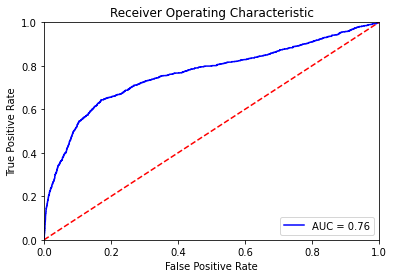

In [299]:
auc_roc_plot(y_test_rl, y_preds_rl)
aucroclr = float(76.42)

Threshold  Total_Cost
0         0.0     3651500
1         0.1     3651500
2         0.2     3559000
3         0.3     2335500
4         0.4     1578000
5         0.5     1449500
6         0.6     1272500
7         0.7     1327000
8         0.8     1425500
9         0.9     1570000
10        1.0     1870000

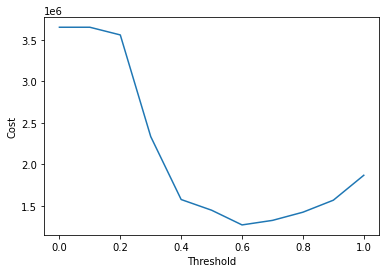

Threshold_min_cost: 0.6


In [300]:
min_cost_threshold(y_test_rl, y_preds_rl)

In [301]:
# Results
lr_cost = total_cost(y_test_rl, y_preds_rl, threshold = 0.6)
diff_lr = ((baseline_all_good-lr_cost)/baseline_all_good*100).round(decimals=2)

print(f'''
Total cost: .... {int(lr_cost)} € 
Difference: ...... {diff_lr.round(decimals=2)} % best performance in comparison to the baseline
''')


Total cost: .... 1272500 € 
Difference: ...... 65.15 % best performance in comparison to the baseline



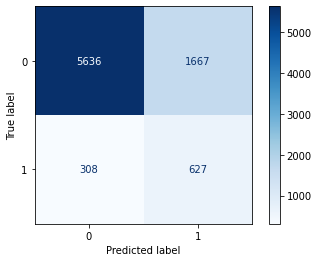

In [302]:
# Confusion Matrix display
plot_confusion_matrix(clf_lr, X_test_rl, y_test_rl, values_format=".4g", cmap="Blues");

# Creates assignments for Final Results
tn, fp, fn, tp = confusion_matrix(y_test_rl == 1, y_preds_rl > 0.5).ravel()
tn_lr = tn
fp_lr = fp
fn_lr = fn
tp_lr = tp

#K Nearest Neighbor (KNN)

In [303]:
# Making a copy of the dataset
df_knn = df_numcat.copy()

In [304]:
# Dividing the dataset in train (80%) and test (20%)
train_set_knn, test_set_knn = train_test_split(df_knn, test_size = 0.2, random_state = seed)

X_train_knn = train_set_knn.drop(['target'], axis = 1)
y_train_knn = train_set_knn['target']

X_test_knn = test_set_knn.drop(['target'], axis = 1)
y_test_knn = test_set_knn['target']

In [305]:
# Normalizing train and test data
scaler_knn = MinMaxScaler()
features_names = X_train_knn.columns

X_train_knn = scaler_knn.fit_transform(X_train_knn)
X_train_knn = pd.DataFrame(X_train_knn, columns = features_names)

X_test_knn = scaler_knn.transform(X_test_knn)
X_test_knn = pd.DataFrame(X_test_knn, columns = features_names)

In [306]:
%%time
for k in range(1, 200, 5):

  k = k + 1

  knn = KNeighborsClassifier(n_neighbors = k).fit(X_train_knn, y_train_knn)

  acc = knn.score(X_test_knn, y_test_knn)

  print('Accuracy for k =', k, ' is:', acc)

Accuracy for k = 2  is: 0.8895362952172857
Accuracy for k = 7  is: 0.8915999028890508
Accuracy for k = 12  is: 0.8949987861131342
Accuracy for k = 17  is: 0.8959698956057296
Accuracy for k = 22  is: 0.8964554503520272
Accuracy for k = 27  is: 0.8971837824714737
Accuracy for k = 32  is: 0.8971837824714737
Accuracy for k = 37  is: 0.8968196164117505
Accuracy for k = 42  is: 0.8963340616654528
Accuracy for k = 47  is: 0.8964554503520272
Accuracy for k = 52  is: 0.8973051711580481
Accuracy for k = 57  is: 0.8962126729788784
Accuracy for k = 62  is: 0.8962126729788784
Accuracy for k = 67  is: 0.896091284292304
Accuracy for k = 72  is: 0.8958485069191552
Accuracy for k = 77  is: 0.8957271182325808
Accuracy for k = 82  is: 0.8958485069191552
Accuracy for k = 87  is: 0.8958485069191552
Accuracy for k = 92  is: 0.8958485069191552
Accuracy for k = 97  is: 0.8959698956057296
Accuracy for k = 102  is: 0.8956057295460063
Accuracy for k = 107  is: 0.8958485069191552
Accuracy for k = 112  is: 0.89572

In [307]:
%%time
knn = KNeighborsClassifier(n_neighbors = 32, weights='uniform').fit(X_train_knn, y_train_knn)

y_preds_knn = knn.predict(X_test_knn)

accuracy_score(y_test_knn, y_preds_knn)

CPU times: user 5.7 s, sys: 399 ms, total: 6.1 s
Wall time: 5.16 s


0.8971837824714737

In [308]:
y_preds_knn = knn.predict_proba(X_test_knn)[:,1]

knn.score(X_test_knn, y_test_knn)

0.8971837824714737

0.7575478834059111


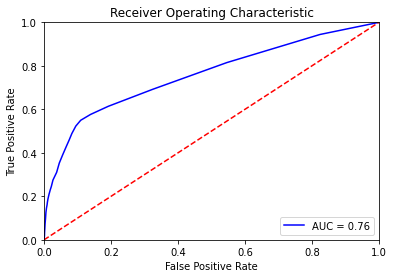

In [309]:
auc_roc_plot(y_test_knn, y_preds_knn)
aucrocknn = float(75.68)

In [310]:
total_cost(y_test_knn, y_preds_knn, threshold = 0.5)

1533500

Threshold  Total_Cost
0         0.0     3114500
1         0.1     1422000
2         0.2     1238000
3         0.3     1310000
4         0.4     1427000
5         0.5     1533500
6         0.6     1601000
7         0.7     1700000
8         0.8     1813500
9         0.9     1864000
10        1.0     1870000

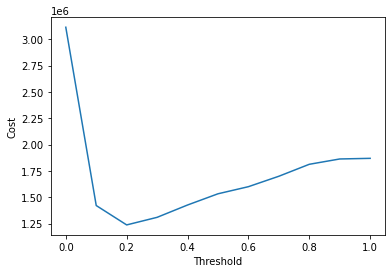

Threshold_min_cost: 0.2


In [311]:
min_cost_threshold(y_test_knn, y_preds_knn)

In [312]:
# Results
knn_cost = total_cost(y_test_knn, y_preds_knn, threshold = 0.2)
diff_knn = ((baseline_all_good-knn_cost)/baseline_all_good*100).round(decimals=2)

print(f'''
Total cost: .... {int(knn_cost)} € 
Difference: ...... {diff_knn.round(decimals=2)} % best performance in comparison to the baseline
''')


Total cost: .... 1238000 € 
Difference: ...... 66.1 % best performance in comparison to the baseline



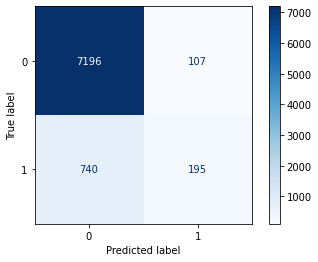

In [313]:
# Confusion Matrix display
plot_confusion_matrix(knn, X_test_knn, y_test_knn, values_format=".4g", cmap="Blues");

# Creates assignments for Final Results
tn, fp, fn, tp = confusion_matrix(y_test_knn == 1, y_preds_knn > 0.5).ravel()
tn_knn = tn
fp_knn = fp
fn_knn = fn
tp_knn = tp

#Support Vector Machine (SVC)

In [346]:
# Making a copy of the dataset
df_svm = df_numcat.copy()

In [347]:
# Dividing the dataset in train (80%) and test (20%)
train_set_svc, test_set_svc = train_test_split(df_svm, test_size = 0.2, random_state = seed)

X_train_svc = train_set_svc.drop(['target'], axis = 1)
y_train_svc = train_set_svc['target']

X_test_svc = test_set_svc.drop(['target'], axis = 1)
y_test_svc = test_set_svc['target']

In [348]:
# Standardization of train and test data
zscore_svc = StandardScaler()
features_names = X_train_svc.columns

X_train_svc = zscore_svc.fit_transform(X_train_svc)
X_train_svc = pd.DataFrame(X_train_svc, columns = features_names)

X_test_svc = zscore_svc.transform(X_test_svc)
X_test_svc = pd.DataFrame(X_test_svc, columns = features_names)

In [349]:
%%time
svc = SVC(random_state=seed, class_weight='balanced',probability=True, verbose=True)

parameters = {'C':[0.1, 1, 10]}

clf_svc = GridSearchCV(svc, parameters, cv = 5).fit(X_train_svc, y_train_svc)

[LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM]CPU times: user 1h 42min 37s, sys: 9.52 s, total: 1h 42min 46s
Wall time: 1h 42min 48s


In [350]:
%%time
y_preds_svc = clf_svc.predict_proba(X_test_svc)[:,1]

clf_svc.score(X_test_svc, y_test_svc)

CPU times: user 24.4 s, sys: 7.07 ms, total: 24.4 s
Wall time: 24.4 s


0.8435299830055839

0.752639564284255


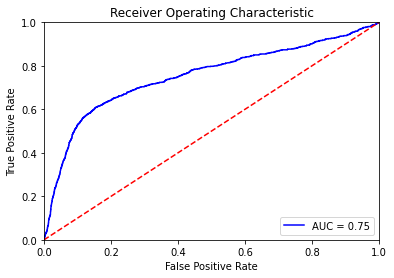

In [351]:
auc_roc_plot(y_test_svc, y_preds_svc)
aucrocsvc = float(75.21)

In [352]:
total_cost(y_test_svc, y_preds_svc, threshold = 0.5)

1837000

Threshold  Total_Cost
0         0.0     3651500
1         0.1     1282500
2         0.2     1247500
3         0.3     1250000
4         0.4     1514000
5         0.5     1837000
6         0.6     1871000
7         0.7     1869000
8         0.8     1870000
9         0.9     1870000
10        1.0     1870000

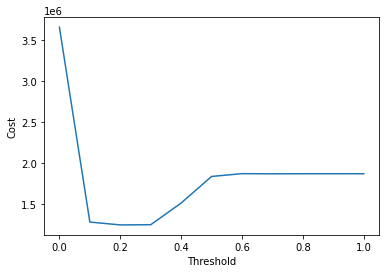

Threshold_min_cost: 0.2


In [353]:
min_cost_threshold(y_test_svc, y_preds_svc)

In [354]:
# Results
svc_cost = total_cost(y_test_svc, y_preds_svc, threshold = 0.2)
diff_svc = ((baseline_all_good-svc_cost)/baseline_all_good*100).round(decimals=2)

print(f'''
Total cost: .... {int(svc_cost)} € 
Difference: ...... {diff_svc.round(decimals=2)} % best performance in comparison to the baseline
''')


Total cost: .... 1247500 € 
Difference: ...... 65.84 % best performance in comparison to the baseline



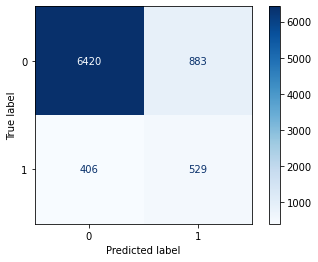

In [355]:
# Confusion Matrix display
plot_confusion_matrix(clf_svc, X_test_svc, y_test_svc, values_format=".4g", cmap="Blues");

# Creates assignments for Final Results
tn, fp, fn, tp = confusion_matrix(y_test_svc == 1, y_preds_svc > 0.5).ravel()
tn_svc = tn
fp_svc = fp
fn_svc = fn
tp_svc = tp

#Decision Trees (DT)

In [314]:
# Making a copy
df_trees = df_numcat.copy()

In [315]:
# Dividing the dataset in train (80%) and test (20%)
train_set_dt, test_set_dt = train_test_split(df_trees, test_size = 0.2, random_state = seed)

X_train_dt = train_set_dt.drop(['target'], axis = 1)
y_train_dt = train_set_dt['target']

X_test_dt = test_set_dt.drop(['target'], axis = 1)
y_test_dt = test_set_dt['target']

In [316]:
%%time
clf_tree = tree.DecisionTreeClassifier(random_state = seed, max_depth = 8).fit(X_train_dt, y_train_dt)

CPU times: user 81.2 ms, sys: 0 ns, total: 81.2 ms
Wall time: 80.7 ms


In [317]:
clf_tree.score(X_test_dt, y_test_dt)

0.8964554503520272

In [318]:
dot_data = StringIO()
export_graphviz(clf_tree, out_file=dot_data,  
                filled = True, rounded = True,
                special_characters = True, feature_names = X_train_dt.columns,class_names=['0','1'])

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  

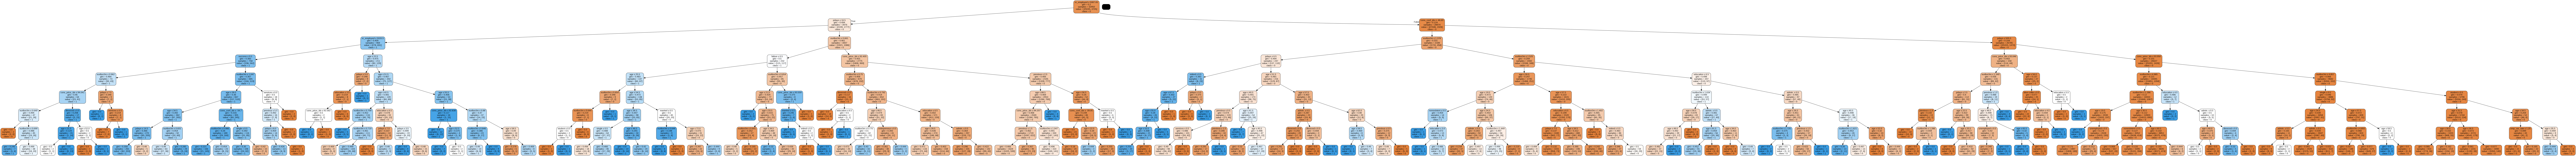

In [319]:
# Rendering the image
# graph.write_png('dt_mkt_camp.png')
Image(graph.create_png())

In [320]:
clf_tree.feature_importances_

array([1.12259753e-02, 5.32674467e-03, 3.41311823e-04, 5.97713916e-04,
       3.43808950e-03, 2.29472487e-03, 9.15897826e-04, 9.80960158e-04,
       2.38330791e-03, 4.20443642e-03, 3.13740810e-03, 3.57646798e-03,
       9.13803957e-04, 2.18257147e-03, 7.23142786e-02, 1.27039273e-01,
       9.32690441e-03, 1.03318493e-04, 1.69514616e-02, 5.78090617e-02,
       8.30537249e-02, 5.91882563e-01])

In [321]:
# Listing feature importance
list(zip(df_numcat.columns, clf_tree.feature_importances_))

[('education', 0.011225975282257002),
 ('admin.', 0.005326744673112023),
 ('blue-collar', 0.00034131182326905917),
 ('entrepreneur', 0.0005977139162015765),
 ('retired', 0.003438089503778212),
 ('services', 0.0022947248693993877),
 ('student', 0.0009158978259472333),
 ('unemployed', 0.0009809601575545726),
 ('divorced', 0.0023833079103104354),
 ('married', 0.004204436420907959),
 ('single', 0.0031374081002671305),
 ('failure', 0.00357646797804649),
 ('nonexistent', 0.0009138039572172272),
 ('success', 0.0021825714696485257),
 ('age', 0.07231427860983793),
 ('pdays', 0.12703927347494332),
 ('previous', 0.009326904407768108),
 ('emp_var_rate', 0.00010331849349390094),
 ('cons_price_idx', 0.016951461642339224),
 ('cons_conf_idx', 0.05780906165006816),
 ('euribor3m', 0.08305372491287262),
 ('nr_employed', 0.5918825629207599)]

In [322]:
# Visualizing variables by importance
important_features = pd.DataFrame(data = clf_tree.feature_importances_, index = X_train_dt.columns, columns = ["value"])
important_features.sort_values(by = "value", ascending = False)

value
nr_employed     0.591883
pdays           0.127039
euribor3m       0.083054
age             0.072314
cons_conf_idx   0.057809
cons_price_idx  0.016951
education       0.011226
previous        0.009327
admin.          0.005327
married         0.004204
failure         0.003576
retired         0.003438
single          0.003137
divorced        0.002383
services        0.002295
success         0.002183
unemployed      0.000981
student         0.000916
nonexistent     0.000914
entrepreneur    0.000598
blue-collar     0.000341
emp_var_rate    0.000103

In [323]:
y_preds_dt = clf_tree.predict_proba(X_test_dt)[:,1]

clf_tree.score(X_test_dt, y_test_dt)

0.8964554503520272

0.7649443016971268


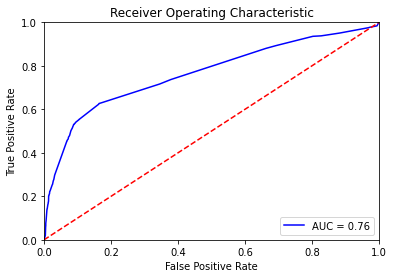

In [324]:
auc_roc_plot(y_test_dt, y_preds_dt)
aucrocdt = float(76.49)

In [325]:
total_cost(y_test_dt, y_preds_dt, threshold = 0.5)

1535000

Threshold  Total_Cost
0         0.0     3661000
1         0.1     1216000
2         0.2     1203500
3         0.3     1251500
4         0.4     1460500
5         0.5     1535000
6         0.6     1589500
7         0.7     1643000
8         0.8     1746500
9         0.9     1846000
10        1.0     1870000

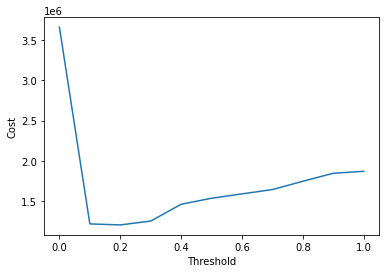

Threshold_min_cost: 0.2


In [326]:
min_cost_threshold(y_test_dt, y_preds_dt)

In [327]:
# Results
dt_cost = total_cost(y_test_dt, y_preds_dt, threshold = 0.2)
diff_dt = ((baseline_all_good-dt_cost)/baseline_all_good*100).round(decimals=2)

print(f'''
Total cost: .... {int(dt_cost)} € 
Difference: ...... {diff_dt.round(decimals=2)} % best performance in comparison to the baseline
''')


Total cost: .... 1203500 € 
Difference: ...... 67.04 % best performance in comparison to the baseline



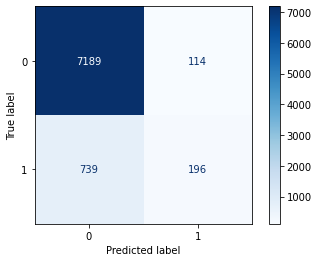

In [328]:
# Confusion Matrix display
plot_confusion_matrix(clf_tree, X_test_dt, y_test_dt, values_format=".4g", cmap="Blues");

# Creates assignments Final Results
tn, fp, fn, tp = confusion_matrix(y_test_dt == 1, y_preds_dt > 0.5).ravel()
tn_dt = tn
fp_dt = fp
fn_dt = fn
tp_dt = tp

#Random Forest (RF)

In [329]:
# Makes a copy
df_rf = df_numcat.copy()

In [330]:
# Dividing the dataset in train (80%) and test (20%)
train_set_rf, test_set_rf = train_test_split(df_rf, test_size = 0.2, random_state = seed)

X_train_rf = train_set_rf.drop(['target'], axis = 1)
y_train_rf = train_set_rf['target']

X_test_rf = test_set_rf.drop(['target'], axis = 1)
y_test_rf = test_set_rf['target']

In [331]:
%%time 
rf = RandomForestClassifier(random_state = seed, class_weight = None).fit(X_train_rf, y_train_rf)

parameters = {'n_estimators':[10, 100, 300, 1000]}

clf_rf = GridSearchCV(rf, parameters, cv = 5).fit(X_train_rf, y_train_rf)

CPU times: user 3min 18s, sys: 30.1 s, total: 3min 48s
Wall time: 3min 48s


In [332]:
y_preds_rf = clf_rf.predict_proba(X_test_rf)[:,1]

clf_rf.score(X_test_rf, y_test_rf)

0.8776402039329935

0.754251604168238


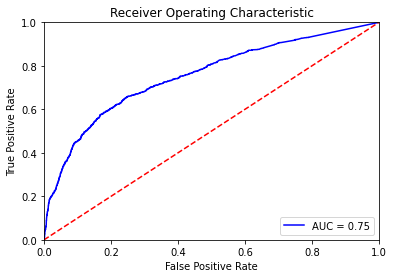

In [333]:
auc_roc_plot(y_test_rf, y_preds_rf)
aucrocrf = float(75.43)

Threshold  Total_Cost
0         0.0     3016000
1         0.1     1521000
2         0.2     1406000
3         0.3     1392500
4         0.4     1417000
5         0.5     1480500
6         0.6     1549000
7         0.7     1603500
8         0.8     1724000
9         0.9     1823000
10        1.0     1870000

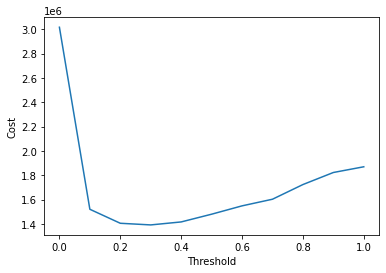

Threshold_min_cost: 0.3


In [334]:
min_cost_threshold(y_test_rf, y_preds_rf)

In [335]:
# Results
rf_cost = total_cost(y_test_rf, y_preds_rf, threshold = 0.3)
diff_rf = ((baseline_all_good-rf_cost)/baseline_all_good*100).round(decimals=2)

print(f'''
Total cost: .... {int(rf_cost)} € 
Difference: ...... {diff_rf.round(decimals=2)} % best performance in comparison to the baseline
''')# Results
rf_cost = total_cost(y_test_rf, y_preds_rf, threshold = 0.3)
diff_rf = ((baseline_all_good-rf_cost)/baseline_all_good*100).round(decimals=2)

print(f'''
Total cost: .... {int(rf_cost)} € 
Difference: ...... {diff_rf.round(decimals=2)} % best performance in comparison to the baseline
''')


Total cost: .... 1392500 € 
Difference: ...... 61.86 % best performance in comparison to the baseline


Total cost: .... 1392500 € 
Difference: ...... 61.86 % best performance in comparison to the baseline



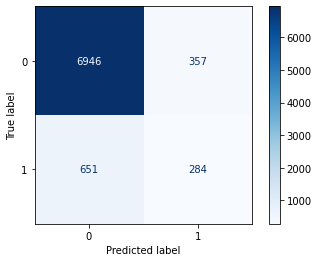

In [336]:
# Confusion Matrxi display
plot_confusion_matrix(clf_rf, X_test_rf, y_test_rf, values_format=".4g", cmap="Blues");

# Creates assignments for Final Results
tn, fp, fn, tp = confusion_matrix(y_test_rf == 1, y_preds_rf > 0.5).ravel()
tn_rf = tn
fp_rf = fp
fn_rf = fn
tp_rf = tp

#Neural Networks (NN)

In [337]:
# Makes a copy
df_nn = df_numcat.copy()

In [338]:
# Dividing the dataset in train (80%) and test (20%)
train_set_nn, test_set_nn = train_test_split(df_nn, test_size = 0.2, random_state = seed)

X_train_nn = train_set_nn.drop(['target'], axis = 1)
y_train_nn = train_set_nn['target']

X_test_nn = test_set_nn.drop(['target'], axis = 1)
y_test_nn = test_set_nn['target']

In [339]:
# Normalization of the train and test data
scaler_nn = MinMaxScaler()
features_names = X_train_nn.columns

X_train_nn = scaler_nn.fit_transform(X_train_nn)
X_train_nn = pd.DataFrame(X_train_nn, columns = features_names)

X_test_nn = scaler_nn.transform(X_test_nn)
X_test_nn = pd.DataFrame(X_test_nn, columns = features_names)

In [340]:
%%time
mlp_nn = MLPClassifier(solver = 'adam', random_state = seed, max_iter = 1000 )

parameters = {'hidden_layer_sizes': [(20,), (20,10), (20, 10, 2)], 'learning_rate_init':[0.0001, 0.001, 0.01, 0.1]}

clf_nn = GridSearchCV(mlp_nn, parameters, cv = 5).fit(X_train_nn, y_train_nn)

CPU times: user 8min 28s, sys: 6.91 s, total: 8min 35s
Wall time: 8min 29s


In [341]:
y_preds_nn = clf_nn.predict_proba(X_test_nn)[:,1]

clf_nn.score(X_test_nn, y_test_nn)

0.8973051711580481

0.7651551153617185


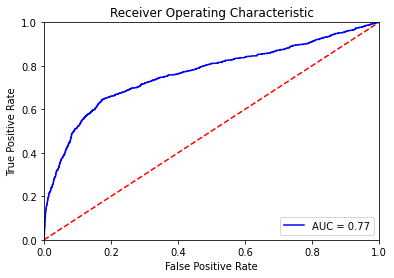

In [342]:
auc_roc_plot(y_test_nn, y_preds_nn)
aucrocnn = float(76.52)

Threshold  Total_Cost
0         0.0     3651500
1         0.1     1526500
2         0.2     1273000
3         0.3     1383500
4         0.4     1489000
5         0.5     1570500
6         0.6     1600000
7         0.7     1644000
8         0.8     1843000
9         0.9     1870000
10        1.0     1870000

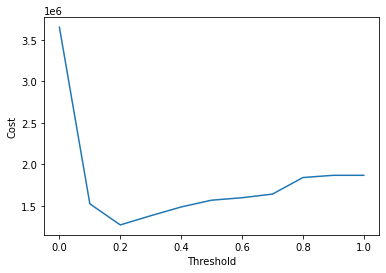

Threshold_min_cost: 0.2


In [343]:
min_cost_threshold(y_test_nn, y_preds_nn)

In [344]:
# Results
nn_cost = total_cost(y_test_nn, y_preds_nn, threshold = 0.2)
diff_nn = ((baseline_all_good-nn_cost)/baseline_all_good*100).round(decimals=2)

print(f'''
Total cost: .... {int(nn_cost)} € 
Difference: ...... {diff_nn.round(decimals=2)} % best performance in comparison to the baseline
''')


Total cost: .... 1273000 € 
Difference: ...... 65.14 % best performance in comparison to the baseline



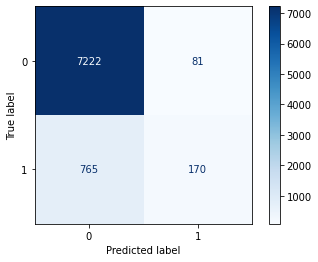

In [345]:
# Confusion Matrix display
plot_confusion_matrix(clf_nn, X_test_nn, y_test_nn, values_format=".4g", cmap="Blues");

# Creates assignments for Final Results
tn, fp, fn, tp = confusion_matrix(y_test == 1, y_preds_nn > 0.5).ravel()
tn_nn = tn
fp_nn = fp
fn_nn = fn
tp_nn = tp

#Results: comparison of all models

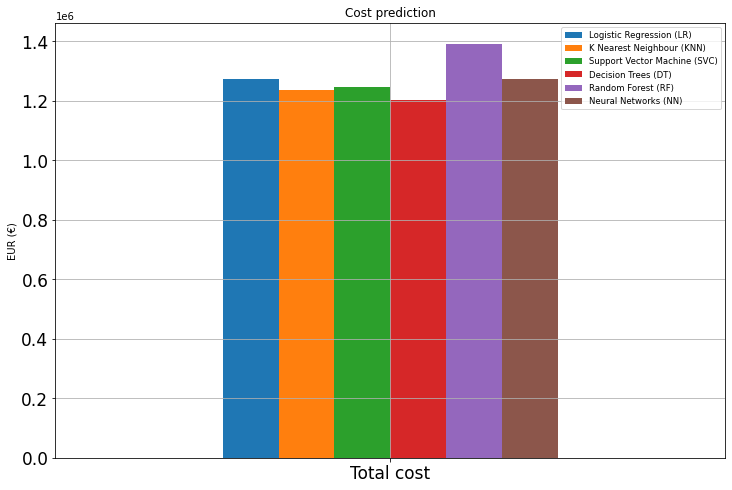

Baseline total cost: 3651500  €



Classifier                    Total cost (€)  Savings (€)  Perform (%)  \
Logistic Regression (LR)           1272500.0    2379000.0        65.15   
K Nearest Neighbour (KNN)          1238000.0    2413500.0        66.10   
Support Vector Machine (SVC)       1247500.0    2404000.0        65.84   
Decision Trees (DT)                1203500.0    2448000.0        67.04   
Random Forest (RF)                 1392500.0    2259000.0        61.86   
Neural Networks (NN)               1273000.0    2378500.0        65.14   

Classifier                    AUC ROC (%)  TN (%)  FP (%)  FN (%)  TP (%)  
Logistic Regression (LR)            76.42   68.41   20.24    3.74    7.61  
K Nearest Neighbour (KNN)           75.68   87.35    1.30    8.98    2.06  
Support Vector Machine (SVC)        75.21   88.29    0.36   11.06    0.29  
Decision Trees (DT)                 76.49   87.27    1.38    8.97    2.38  
Random Forest (RF)                  75.43   84.32    4.33    7.90    3.45  
Neural Networks (NN)                76.52   87.67    0.98    9.29    2.06

In [356]:
# Creating performance table
results_p = {'Classifier': ['Total cost (€)','Savings (€)','Perform (%)','AUC ROC (%)','TN (%)','FP (%)','FN (%)','TP (%)'],
            'Logistic Regression (LR)': [lr_cost, (baseline_all_good-lr_cost), diff_lr, aucroclr, (tn_lr/8238*100).round(decimals=2),
                                         (fp_lr/8238*100).round(decimals=2), (fn_lr/8238*100).round(decimals=2), (tp_lr/8238*100).round(decimals=2)],
            'K Nearest Neighbour (KNN)': [knn_cost, (baseline_all_good-knn_cost), diff_knn, aucrocknn, (tn_knn/8238*100).round(decimals=2),(fp_knn/8238*100).round(decimals=2),
                                         (fn_knn/8238*100).round(decimals=2),(tp_nn/8238*100).round(decimals=2)],
            'Support Vector Machine (SVC)': [svc_cost, (baseline_all_good-svc_cost), diff_svc, aucrocsvc, (tn_svc/8238*100).round(decimals=2),(fp_svc/8238*100).round(decimals=2),
                                             (fn_svc/8238*100).round(decimals=2),(tp_svc/8238*100).round(decimals=2)],
            'Decision Trees (DT)': [dt_cost, (baseline_all_good-dt_cost), diff_dt, aucrocdt, (tn_dt/8238*100).round(decimals=2), (fp_dt/8238*100).round(decimals=2),
                                    (fn_dt/8238*100).round(decimals=2),(tp_dt/8238*100).round(decimals=2)],
            'Random Forest (RF)': [rf_cost, (baseline_all_good-rf_cost), diff_rf, aucrocrf, (tn_rf/8238*100).round(decimals=2), (fp_rf/8238*100).round(decimals=2),
                                   (fn_rf/8238*100).round(decimals=2),(tp_rf/8238*100).round(decimals=2)],
            'Neural Networks (NN)': [nn_cost, (baseline_all_good-nn_cost), diff_nn, aucrocnn, (tn_nn/8238*100).round(decimals=2),
                                     (fp_nn/8238*100).round(decimals=2),(fn_nn/8238*100).round(decimals=2),(tp_nn/8238*100).round(decimals=2)]
           }

dfp = pd.DataFrame(results_p, columns = ['Classifier', 
                                     'Logistic Regression (LR)',
                                     'K Nearest Neighbour (KNN)',
                                     'Support Vector Machine (SVC)',
                                     'Decision Trees (DT)',
                                     'Random Forest (RF)',
                                     'Neural Networks (NN)'
                                        ])
dfp.set_index("Classifier", inplace=True)

results_p = dfp.T
resultsT = dfp

# Creating table for graph visualization
results_g = {'Classifier': ['Total cost'],
            'Logistic Regression (LR)': [lr_cost],
            'K Nearest Neighbour (KNN)': [knn_cost],
            'Support Vector Machine (SVC)': [svc_cost],
            'Decision Trees (DT)': [dt_cost],
            'Random Forest (RF)': [rf_cost],
            'Neural Networks (NN)': [nn_cost]
           }

dfg = pd.DataFrame(results_g, columns = ['Classifier', 
                                     'Logistic Regression (LR)',
                                     'K Nearest Neighbour (KNN)',
                                     'Support Vector Machine (SVC)',
                                     'Decision Trees (DT)',
                                     'Random Forest (RF)',
                                     'Neural Networks (NN)'
                                        ])
dfg.set_index("Classifier", inplace=True)


print("")
results_g = dfg.T
resultsT2 = dfg

# Display graph
resultsT2.plot(kind="bar", title=("Cost prediction"), figsize=(12,8) ,fontsize=17, grid=True)
plt.legend(fontsize=8.5)
plt.xlabel('')
plt.xticks(rotation='horizontal')
plt.ylabel('EUR (€)')
plt.show()

# Display table
print("Baseline total cost:",baseline_all_good," €")
print("")
results_p

#Conclusion
In response to a supervised classification problem, the dataset comprises:

Number of clients:41188                                                         
Number of variables: 16 incl. target    

Amongst the total clients:

Have not subscribed the term deposit: ... 36548 (88.73 %)  
Have subscribed the term deposit: ........... 4640 (11.27 %)   
Best model: **Decision Trees (DT).**               

With the proposed model, the cost to the bank would be 1,203,500 €. It means that the bank would save 2,448,000 € with a high performance reflected in a savings rate of around 67%.

Without any Machine Learning Model, the bank's cost would be 3,651,500 € - considering all clients as good candidates without subscribing to the deposit.